<h1 align="center"><u><b> ΝΕΥΡΩΝΙΚΑ ΔΙΚΤΥΑ ΚΑΙ ΕΥΦΥΗ ΥΠΟΛΟΓΙΣΤΙΚΑ ΣΥΣΤΗΜΑΤΑ</b></u></h1>

<h2 align="center"><u><b> Εργασία 1<sup>η</sup></h2>
<ul>
<li>Παναγιώτης Παπαδέας 03118039</li>

<li>Εμμανουήλ Βλάσσης 03118086</li>

<li>Λαουρεντιάν Γκούμε 03118014</li>
</ul>

<h2><u><b> Μέρος 1. UCI Dataset</b> </u></h2>

<h4 align="justify">Στην παρούσα εργασία θα ασχοληθούμε με το dataset Quality Assessment of Digital Colposcopies (U11). Το dataset μας περιέχει την αξιόλογηση της ποιότητας ψηφιακών απεικονίσεων κολποσκόπησης από ειδικούς. Η αξιολόγηση αυτή προκύπτει από την επικρατούσα άποψη των ειδικών (consensus) και κατατάσσεται σε δύο κατηγορίες 0 και 1 όπου το bad αντιστοιχεί στο 0 και το good σε 1. Συνεπώς, πρόκειται για binary classification problem. Το dataset μας είναι χωρισμένο σε 3 csv αρχεία τα οποία δεν χρειάζονται κάποια προεπεξεργασία.</h4>

In [ ]:
!ls

green.csv  hinselmann.csv  sample_data	schiller.csv


In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/





  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=6bafc32a56b04e855d39dd84e9563d8a19128da36193a82f43a3af007909f54c

  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003

Successfully built sklearn




<h4 align="justify">Παρατηρούμε ότι αποτελείται από 287 δείγματα (γραμμές) και 69 στήλες από τις οποίες τα 62 αποτελούν τα features και τα 7 είναι target variables (τα 6 αποτελούν τις αξιολογήσεις του καθενός από τους ειδικούς και το τελευταίο αντιστοιχεί στο consensus). Επιπλέον δεν υπάρχουν απουσιάζουσες τιμές ενώ το ποσοστό των 1 (75%) είναι σημαντικά μεγαλύτερο από το ποσοστό των 0 (25%) συνεπώς αντιμετωπίζουμε ένα imbalanced dataset.</h4>

<h4>Κάθε δείγμα αποτελείται από τα εξής features:</h4>


- cervix_area

- os_area

- walls_area

- speculum_area

- artifacts_area

- cervix_artifacts_area

- os_artifacts_area

- walls_artifacts_area

- speculum_artifacts_area

- cervix_specularities_area
 
- os_specularities_area

- walls_specularities_area

- speculum_specularities_area

- specularities_area

- area_h_max_diff

- rgb_cervix_r_mean

- rgb_cervix_r_std

- rgb_cervix_r_mean_minus_std

- rgb_cervix_r_mean_plus_std

- rgb_cervix_g_mean

- rgb_cervix_g_std

- rgb_cervix_g_mean_minus_std

- rgb_cervix_g_mean_plus_std

- rgb_cervix_b_mean

- rgb_cervix_b_std

- rgb_cervix_b_mean_minus_std

- rgb_cervix_b_mean_plus_std

- rgb_total_r_mean

- rgb_total_r_std

- rgb_total_r_mean_minus_std

- rgb_total_r_mean_plus_std

- rgb_total_g_mean

- rgb_total_g_std

- rgb_total_g_mean_minus_std

- rgb_total_g_mean_plus_std

- rgb_total_b_mean

- rgb_total_b_std

- rgb_total_b_mean_minus_std

- rgb_total_b_mean_plus_std

- hsv_cervix_h_mean

- hsv_cervix_h_std

- hsv_cervix_s_mean

- hsv_cervix_s_std

- hsv_cervix_v_mean

- hsv_cervix_v_std
 
- hsv_total_h_mean

- hsv_total_h_std

- hsv_total_s_mean

- hsv_total_s_std

- hsv_total_v_mean

- hsv_total_v_std

- fit_cervix_hull_rate

- fit_cervix_hull_total

- fit_cervix_bbox_rate

- fit_cervix_bbox_total

- fit_circle_rate

- fit_circle_total

- fit_ellipse_rate fit_ellipse_total

- fit_ellipse_goodness

- dist_to_center_cervix

- dist_to_center_os

- experts::0

- experts::1

- experts::2 

- experts::3

- experts::4

- experts::5

- consensus 



<h4 align="justify">Όλα τα features έχουν τιμές που αντιστοιχούν σε θετικούς float αριθμούς εκτός από τα 7 τελευταία που έχουν τιμές 0 και 1 και αποτελούν τις γνώμες των ειδικών και την επικρατούσα άποψη τους. Οι γραμμές δεν είναι αριθμημένες (287 samples), ενώ οι στήλες έχουν επικεφαλίδα το όνομα του feature που αφορούν. Οι ετικέτες των δειγμάτων βρίσκονται στην τελευταία κολώνα και όπως αναφέραμε προηγουμένως αποτελεί ένα binary classification problem. Δεν έχουμε απουσιάζουσες τιμές. Έχουμε δύο κλάσεις που αφορούν την ποιότητα της κολποσκόπησης (bad και good). Από τα 287 δείγματα 71 αντιστοιχούν στην κατηγορία bad (0) και 216 στην κατηγορία good (1). </h4>

In [ ]:
import time
import pandas as pd
import numpy as np

data1 = pd.read_csv("green.csv", header=None)
print(data1.shape)

data2 = pd.read_csv("hinselmann.csv", header=None)
print(data2.shape)

data3 = pd.read_csv("schiller.csv", header=None)
print(data3.shape)

#skip headers
data1 = data1.iloc[1:]
data2 = data2.iloc[1:]
data3 = data3.iloc[1:]
total = pd.concat([data1, data2, data3])
# Print NaN
print("Number of NaN = " + str(np.sum(np.sum(total.isna()))))
#print(total)

#numpy array
data = np.array(total)
for i in range(data.shape[0]):
  for j in range(data.shape[1]):
    data[i][j] = float(data[i][j])
#print(data)    
print(len(data))    

# Features
X = data[:, 0:62]
print("X shape: " + str(X.shape))
# Includes 6 experts and the consensus
Ytargets = data[:, 62:]
# Includes consensus
y = data[:, 68]
y = y.astype(int)

print("y shape that has the consensus: " + str(y.shape))

n_samples = X.shape[0]
n_features = X.shape[1]
n_labels = len(y)

# Balance dataset (binary classification)
num0 = np.sum([y==0])
num1 = np.sum([y==1])
print("\nChecking balance")
print("Number of zeros: " + str(num0))
print("Number of ones: " + str(num1))
print("Zeros %: " + str( 100 * num0 / (num0 + num1) ) + " %")
print("Ones %: " + str( 100 * num1 / (num0 + num1) ) + " %")
print("Ones are", num1/num0, "times more than zeros")

(99, 69)

(98, 69)

(93, 69)

Number of NaN = 0

287

X shape: (287, 62)

y shape that has the consensus: (287,)



Checking balance

Number of zeros: 71

Number of ones: 216

Zeros %: 24.738675958188153 %

Ones %: 75.26132404181185 %

Ones are 3.0422535211267605 times more than zeros


<h4 align="justify">Μας ενδιαφέρουν οι τιμές των χαρακτηριστικών της κολποσκόπησης και η επικρατούσα άποψη των ειδικών. Αφού τις συλλέξουμε στις μεταβλητές Χ και y χωρίζουμε το dataset μας σε trainset (70%) και testset (30%). Δεν έχουμε απουσιάζουσες τιμές ούτε απαιτείται κάποια ειδική διαχείριση κατηγορικών ή διατεταγμένων χαρακτηριστικών. </h4>

In [ ]:
from sklearn.model_selection import train_test_split

# Split Dataset: 30% Testset 70% Trainset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=False)

# Balance train set (binary classification)
num0 = np.sum([y_train==0])
num1 = np.sum([y_train==1])
print("\nChecking balance of train set")
print("Number of labeled zeros: " + str(num0))
print("Number of labeled ones: " + str(num1))
print("Zeros %: " + str( 100 * num0 / (num0 + num1) ) + " %")
print("Ones %: " + str( 100 * num1 / (num0 + num1) ) + " %")

# Balance total (binary classification)
num0 = np.sum([y==0])
num1 = np.sum([y==1])
print("\nChecking balance of dataset")
print("Number of labeled zeros: " + str(num0))
print("Number of labeled ones: " + str(num1))
print("Zeros %: " + str( 100 * num0 / (num0 + num1) ) + " %")
print("Ones %: " + str( 100 * num1 / (num0 + num1) ) + " %")

print("\nX_train shape: " + str(X_train.shape))
print("X_test shape: " + str(X_test.shape))
print("\ny_train shape: " + str(y_train.shape))
print("y_test shape: " + str(y_test.shape))



Checking balance of train set

Number of labeled zeros: 46

Number of labeled ones: 154

Zeros %: 23.0 %

Ones %: 77.0 %



Checking balance of dataset

Number of labeled zeros: 71

Number of labeled ones: 216

Zeros %: 24.738675958188153 %

Ones %: 75.26132404181185 %



X_train shape: (200, 62)

X_test shape: (87, 62)



y_train shape: (200,)

y_test shape: (87,)


<h4>Για την ταξινόμηση θα μελετήσουμε τους παρακάτω ταξινομητές:</h4>

*   dummy classifier(με κάθε strategy)
*   Gaussian Naive Bayes
*   K-NearestNeighbors
*   Logisitic Regression

<h4>Οι μετρικές με τις οποίες θα γίνει η αξιολόγηση είναι:</h4>

*   Accuracy
*   F1 (όχι macro αφού δεν έχουμε multiclass problem)

<h4>Τέλος για όλα τα πειράματα θα χρησιμοποιήσουμε 10-fold cross validation.</h4>

<h3><u><b>Out-of-the-box</b></u></h3>

<h4 align="justify">Αρχικά μελετάμε τους ταξινομητές για τις default τιμές τους, καταγράφουμε το accuracy τους και τους παρουσιάζουμε ταξινομημένους σε σχέση με την τιμή αυτή: <h4>

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings('ignore')

# Dummy Classifier
dummy_uniform = DummyClassifier(strategy="uniform")
dummy_constant_0 = DummyClassifier(strategy="constant", constant=0)
dummy_constant_1 = DummyClassifier(strategy="constant", constant=1)
dummy_most_frequent = DummyClassifier(strategy="most_frequent")
dummy_stratified = DummyClassifier(strategy="stratified") 

#Accuracy Score
accuracy = {}
plot_accuracy = []
dummy_uniform.fit(X_train, y_train)
accuracy['uniform (random) \t'] = dummy_uniform.score(X_test, y_test)
plot_accuracy.append(accuracy['uniform (random) \t'])
dummy_constant_0.fit(X_train, y_train)
accuracy['constant 0 \t\t'] = dummy_constant_0.score(X_test, y_test)
plot_accuracy.append(accuracy['constant 0 \t\t'])
dummy_constant_1.fit(X_train, y_train)
accuracy['constant 1 \t\t'] = dummy_constant_1.score(X_test, y_test)
plot_accuracy.append(accuracy['constant 1 \t\t'])
dummy_most_frequent.fit(X_train, y_train)
accuracy['most frequent label \t'] = dummy_most_frequent.score(X_test, y_test)
plot_accuracy.append(accuracy['most frequent label \t'])
dummy_stratified.fit(X_train, y_train)
accuracy['stratified \t\t'] = dummy_stratified.score(X_test, y_test)
plot_accuracy.append(accuracy['stratified \t\t'])

#Gaussian NB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
accuracy['GaussianNB \t\t'] = gnb.score(X_test,y_test)
plot_accuracy.append(accuracy['GaussianNB \t\t'])

#kNN
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
accuracy['KNeighbors \t\t'] = knn.score(X_test,y_test)
plot_accuracy.append(accuracy['KNeighbors \t\t'])

#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
accuracy['LogisticRegression \t'] = lr.score(X_test,y_test)
plot_accuracy.append(accuracy['LogisticRegression \t'])

#Sorted Accuracy
sorted_accuracy = [] 
print("Classification Accuracy on the given Dataset (30% test set)\n")
sorted_accuracy = [(k, accuracy[k]) for k in sorted(accuracy, key=accuracy.get, reverse=True)]
print("Accuracy Scores")
for clf, score in sorted_accuracy:
  print(str(clf) + ": ", score)
print()


Classification Accuracy on the given Dataset (30% test set)



Accuracy Scores

constant 1 		:  0.7126436781609196

most frequent label 	:  0.7126436781609196

LogisticRegression 	:  0.6896551724137931

stratified 		:  0.6781609195402298

KNeighbors 		:  0.6666666666666666

GaussianNB 		:  0.6206896551724138

uniform (random) 	:  0.4482758620689655

constant 0 		:  0.28735632183908044




<h4 align="justify">Αντίστοιχα για τις τιμές f1 των ταξινομητών επαναλαμβάνουμε την διαδικασία: </h4>

In [ ]:
from sklearn.metrics import f1_score

y_pred1 = dummy_uniform.predict(X_test)
y_pred2 = dummy_constant_0.predict(X_test)
y_pred3 = dummy_constant_1.predict(X_test)
y_pred4 = dummy_most_frequent.predict(X_test)
y_pred5 = dummy_stratified.predict(X_test)
y_predgnb = gnb.predict(X_test)
y_predknn = knn.predict(X_test)
y_predlr = lr.predict(X_test)
#print(y_pred1)
label_names = ["bad", "good"]

print("F1 scores")

f1_scores = {}
list_f1 = []
f1 = f1_score(y_test, y_pred1, average='weighted')
f1_scores["uniform \t\t"] = f1;
list_f1.append(f1)
f1 = f1_score(y_test, y_pred2, average='weighted')
f1_scores["constant 0 \t\t"] = f1;
list_f1.append(f1)
f1 = f1_score(y_test, y_pred3, average='weighted')
f1_scores["constant 1 \t\t"] = f1;
list_f1.append(f1)
f1 = f1_score(y_test, y_pred4, average='weighted')
f1_scores["most frequent \t\t"] = f1;
list_f1.append(f1)
f1 = f1_score(y_test, y_pred5, average='weighted')
f1_scores["stratified \t\t"] = f1;
list_f1.append(f1)
f1 = f1_score(y_test, y_predgnb, average='weighted')
f1_scores["GaussianNB \t\t"] = f1;
list_f1.append(f1)
f1 = f1_score(y_test, y_predknn, average='weighted')
f1_scores["kNN \t\t\t"] = f1;
list_f1.append(f1)
f1 = f1_score(y_test, y_predlr, average='weighted')
f1_scores["Logistic Regr \t\t"] = f1;
list_f1.append(f1)

#Sorted F1
sorted_f1 = [] 
print("F1 on the given Dataset (30% test set)\n")
sorted_f1 = [(k, f1_scores[k]) for k in sorted(f1_scores, key=f1_scores.get, reverse=True)]
print("F1 Scores")
for clf, score in sorted_f1:
  print(str(clf) + ": ", score)
print()

F1 scores

F1 on the given Dataset (30% test set)



F1 Scores

Logistic Regr 		:  0.6585322723253758

GaussianNB 		:  0.6326337506010828

stratified 		:  0.6307879651905314

kNN 			:  0.623923193266259

constant 1 		:  0.593072591221168

most frequent 		:  0.593072591221168

uniform 		:  0.49355700528114327

constant 0 		:  0.1282840722495895




<h4 align="justify">Κατασκευάζουμε το markdown table με όλους τους ταξινομητές και τα αντίστοιχα ποσοστά τους σε accuracy και f1-score. Με επαναλαμβανόμενες εκτελέσεις του κώδικα είναι πιθανό τα accuracies να διαφέρουν λίγο λόγω της τυχαιότητας του train set. </h4>

Estimator | Accuracy (%) |  F1 Metric (%) |
--- | --- | --- |
Dummy const 1 | 71.26	| 59.30 
Dummy most freq  | 71.26	| 59.30 
Logistic Regression | 68.96 | 65.85 
Dummy stratified | 58.62 | 63.07
K-Nearest Neighbors | 66.66 | 62.39 
GaussianNaive Bayes | 62.06 | 63.26
Dummy uniform | 44.82 | 49.35
Dummy const 0 |  28.73 |  12.82


<h4 align="justify">Αντίστοιχα σχηματίζουμε τα διαγράμματα bar-plots των ταξινομητών για τις ίδιες μετρικές:</h4>

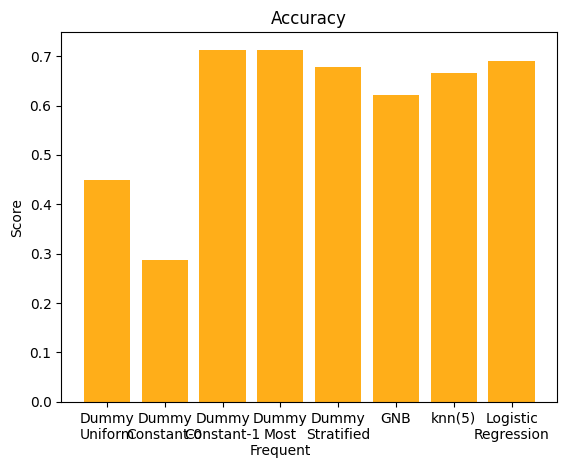

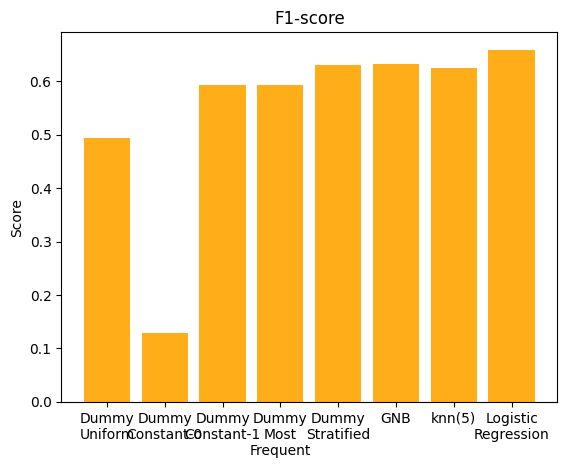

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

# Plot bar for f1_macro and accuracy
def plot_bar(classifiers, scores, title):
  y_pos = np.arange(len(classifiers))
  plt.bar(y_pos, scores, align='center', color ='orange', alpha=0.9)
  plt.xticks(y_pos, classifiers)
  plt.ylabel('Score')
  plt.title(title)
  plt.show()


classifiers = ('Dummy\nUniform', 'Dummy\nConstant-0', 'Dummy\nConstant-1', 'Dummy\nMost\nFrequent', 'Dummy\nStratified', 'GNB', 'knn(5)', 'Logistic\nRegression')
plot_bar(classifiers, plot_accuracy, "Accuracy")
plot_bar(classifiers, list_f1, "F1-score")



<h4 align="justify">Βλέπουμε ότι το καλύτερο accuracy επιτυγχάνουν οι ταξινομητές "Dummy constant 1" και "Dummy most frequent", που είναι λογικό, καθώς αντιμετωπίζουμε ένα imbalanced set με σημαντική διαφορά στη συχνότητα εμφάνισης των δύο κλάσεων, ενώ ακολουθεί ο logistic regression classifier, ο οποίος επωφελείται από το γεγονός ότι αντιμετωπίζουμε binary classification problem. 
Όσον αφορά τη μετρική f1 ωστόσο, βλέπουμε τους dummy ταξινομητές να υποχωρούν σε σχέση με τους υπόλοιπους, ενώ ο logistic regression εμφανίζει την καλύτερη επίδοση για τον ίδιο λόγο πιθανώς που αναφέραμε και προηγουμένως. </h4>

<h3><u><b> Βελτιστοποίηση </b></u></h3>

<h4 align="justify">Για να επιτύχουμε βελτιστοποίηση των ταξινομητών ως προς τις μετρικές που εξετάζουμε χρησιμοποιούμε τις εξής τεχνικές:</h4>


*   προεπεξεργασία
*   pipelines
*   gridsearch

<h4 align="justify">Αρχικά, ορίζουμε τους εξής μετασχηματιστές για την προεπεξεργασία των δεδομένων:</h4>


*   Variance thresholder, για τη μείωση των διαστάσεων εισόδου
*   Standard scaler, για την κανονικοποίηση των δεδομένων προκειμένου να ακολουθούν κανονική κατανομή Ν(0,1)
*   Random Oversampler, για την εξισορρόπηση του imbalanced dataset μας
*   PCA για την εξαγωγή χαρακτηριστικών των δεδομένων εισόδου με στόχο τη μείωση της διαστατικότητάς τους

<h4 align="justify">Έπειτα, δημιουργούμε ένα pipeline για κάθε εκτιμητή και εισάγουμε τους παραπάνω μετασχηματιστές.</h4>




In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline

#Initialize transformers without hyperparameters
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()

#Estimators
estimators = [GaussianNB(), KNeighborsClassifier(n_jobs=-1), LogisticRegression(n_jobs=-1)]

#pipe
pipes = []
for i in range(len(estimators)):
  pipes.append(Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('estimator', estimators[i])],memory = 'tmp'))

<h4 align="justify">Αξίζει να αναφέρουμε σε αυτό το σημείο πως δεν ασχολούμαστε με την βελτιστοποίηση των dummy ταξινομητών, καθώς έχουμε ασχοληθεί με όλα τα πιθανά είδη προηγουμένως και δεν έχει ιδιαίτερη αξία η βελτιστοποίηση τους.</h4>

<h4 align="justify">Τέλος, σχετικά με το grid search μελετάμε τις πιθανές τιμές που θα ορίσουμε σε κάθε μετασχηματιστή.</h4>

<h4 align="justify">Για το variance threshold εξετάζουμε τις διασπορές των 67 features του dataset μας:</h4>

In [ ]:
train_variance = X_train.var(axis=0)
print(train_variance)
print(np.max(train_variance))

[0.04510227875426018 3.907751379920253e-05 0.03488991564641694

 0.02723250624612914 0.005285261975563376 0.00503961378626487

 0.02799366464619427 0.014521984345426668 0.010708557274252253

 0.0011314087540129955 0.0037164108497689885 0.000257731137739387

 0.006901972701171349 0.0005862991881262295 0.01570201262169169

 2527.2555892183514 255.92326208102392 1553.474931297116

 4012.8827713035844 2581.285161225522 263.1108969638016 1599.0403426837554

 4089.7517737005187 5001.640707609888 404.9724394134911 3103.7753805376547

 7709.450913503728 1352.7548280930182 357.7551845682818 665.061693188793

 2755.9583321318164 1257.5088645481787 410.1901799141822 630.0456451466016

 2705.352443775268 2922.953334167787 558.1342655607591 1418.8079445692483

 5543.367254882806 0.3778091980653581 0.23183398918333398

 2943.3861511424834 133.96360598094373 3093.6383452669993

 318.74204467102805 0.36187859114910303 0.043264490995578345

 2978.2585067149657 309.28144879344455 1524.7221283208314

 38

<h4 align="justify">Αντίστοιχα για την τεχνική PCA ορίζουμε ένα σύνολο πιθανών τιμών γνωρίζοντας ότι η διαστατικότητα του προβλήματός μας είναι n=62 και δεν πρέπει οι τιμές να ξεπερνούν αυτό το όριο. </h4>

<h4 align="justify">Τέλος, ορίζουμε ένα πλήθος τιμών για τις υπερπαραμέτρους κάθε εκτιμητή, το οποίο προσαρμόζουμε αν χρειαστεί ανάλογα με την έξοδο των καλύτερων εκτιμητών κάθε φορά. </h4>

In [ ]:
vthreshold = [0, 0.15, 0.2, 1] ## Hyperparameters for variance thresholding
n_components = [30, 40, 50] ## Hyperparameters for Principal Component Analysis

# Gaussian NB Classifier Hyperparameters
var_smoothing = [1e-9, 1e-3, 1]

# KNN Classifier Hyperparameters
n_neighbors = [1, 3, 5, 7]
metric = ['euclidean', 'manhattan', 'minkowski', 'mahalanobis']

# Logistic Regression Hyperparameters
max_iter = [100, 200]
penalty = ['l1', 'l2']
solver = ['lbfgs','liblinear']

<h3><u> Βελτιστοποίηση ως προς το Accuracy</u></h3>

<h4 align="justify">Ορίζουμε κάθε εκτιμητή με βάση ένα gridsearch για την εύρεση των καλύτερων υπερπαραμέτρων. Στο gridsearch θέτουμε στόχο το accuracy και χρησιμοποιούμε 10-fold cross validation.</h4>

<h4 align="justify">Έπειτα, τους εκπαιδεύουμε και βρίσκουμε τις καλύτερες παραμέτρους για κάθε pipeline classifier, τις οποίες και τυπώνουμε.</h4>

In [ ]:
from sklearn.model_selection import GridSearchCV
import time

estimator_nb = GridSearchCV(pipes[0], dict(selector__threshold=vthreshold,
                                              pca__n_components=n_components, estimator__var_smoothing=var_smoothing), cv=10, scoring='accuracy', n_jobs=-1)

estimator_knn = GridSearchCV(pipes[1], dict(selector__threshold=vthreshold,
                                            pca__n_components=n_components, estimator__n_neighbors=n_neighbors,
                                            estimator__metric=metric), cv=10, scoring='accuracy', n_jobs=-1)

estimator_lr = GridSearchCV(pipes[2], dict(selector__threshold=vthreshold,
                                           pca__n_components=n_components, estimator__max_iter=max_iter,
                                           estimator__penalty=penalty, estimator__solver=solver), cv=10, scoring='accuracy', n_jobs=-1)

In [ ]:
# Find Optimal Hyperparameters for Gaussian NB
estimator_nb.fit(X_train, y_train)
best_nb1 = estimator_nb.best_estimator_
print(estimator_nb.best_estimator_)
print(estimator_nb.best_params_)

Pipeline(memory='tmp',

         steps=[('selector', VarianceThreshold(threshold=0)),

                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),

                ('pca', PCA(n_components=30)),

                ('estimator', GaussianNB(var_smoothing=1))])

{'estimator__var_smoothing': 1, 'pca__n_components': 30, 'selector__threshold': 0}


In [ ]:
# Find Optimal Hyperparameters for KNN
estimator_knn.fit(X_train, y_train)
best_knn1 = estimator_knn.best_estimator_
print(estimator_knn.best_estimator_)
print(estimator_knn.best_params_)

Pipeline(memory='tmp',

         steps=[('selector', VarianceThreshold(threshold=1)),

                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),

                ('pca', PCA(n_components=30)),

                ('estimator',

                 KNeighborsClassifier(metric='manhattan', n_jobs=-1,

                                      n_neighbors=1))])

{'estimator__metric': 'manhattan', 'estimator__n_neighbors': 1, 'pca__n_components': 30, 'selector__threshold': 1}


In [ ]:
# Find Optimal Hyperparameters for Logistic Regression
estimator_lr.fit(X_train, y_train)
best_lr1 = estimator_lr.best_estimator_
print(estimator_lr.best_estimator_)
print(estimator_lr.best_params_)

Pipeline(memory='tmp',

         steps=[('selector', VarianceThreshold(threshold=0)),

                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),

                ('pca', PCA(n_components=40)),

                ('estimator', LogisticRegression(n_jobs=-1))])

{'estimator__max_iter': 100, 'estimator__penalty': 'l2', 'estimator__solver': 'lbfgs', 'pca__n_components': 40, 'selector__threshold': 0}


<h4 align="justify">Τέλος ορίζουμε μια συνάρτηση όπου για κάθε καλύτερο εκτιμητή τον εκπαιδεύουμε στο train set και καταγράφουμε την επίδοσή του στο test set. Μετράμε τους χρόνους της εκπαίδευσης και της πρόβλεψής τους. Τυπώνουμε τα αποτελέσματα:</h4>

In [ ]:
from sklearn.metrics import classification_report

def evaluate_best(estimator, X_train, X_test, y_train, y_test, metric='accuracy'):
  start_time = time.time()
  # fit on train dataset
  estimator.fit(X_train, y_train)
  train_time = time.time() - start_time

  # evauate on test dataset
  start_time = time.time()
  preds = estimator.predict(X_test)
  #print(classification_report(y_test, preds))
  test_time = time.time() - start_time
  performance = classification_report(y_test, preds,output_dict='True')[metric]  
  return performance, train_time, test_time

best_estimators = [best_nb1, best_knn1, best_lr1]
labels = ['Best Gaussian NB Classifier', 'Best KNN Classifier', 'Best LR Classifier']

evaluations1 = []
for i in range(len(best_estimators)):
  print('-------------- '+labels[i]+'---------------\n')
  metrics, train_time, test_time = evaluate_best(best_estimators[i], X_train, X_test, y_train, y_test, 'accuracy')
  print('Accuracy = '+str(100*metrics)+'%')
  print('Train Time = '+str(1000*train_time)+' msec')
  print('Evaluation Time = '+str(1000*test_time)+' msec\n')
  evaluations1.append((metrics, train_time, test_time))



-------------- Best Gaussian NB Classifier---------------



Accuracy = 70.11494252873564%

Train Time = 83.71472358703613 msec

Evaluation Time = 1.461029052734375 msec



-------------- Best KNN Classifier---------------



Accuracy = 68.96551724137932%

Train Time = 58.594465255737305 msec

Evaluation Time = 107.27238655090332 msec



-------------- Best LR Classifier---------------



Accuracy = 72.41379310344827%

Train Time = 94.71416473388672 msec

Evaluation Time = 1.016378402709961 msec




<h3><u> Βελτιστοποίηση ως προς την F1 metric </u></h3>

<h4 align="justify">Αντίστοιχη διαδικασία ακολουθούμε για την βελτιστοποίηση των ταξινομητών, αλλά έχουμε ως στόχο την βελτίωση της f1 αυτή τη φορά και χρησιμοποιούμε και πάλι 10-fold cross validation: </h4> 

In [ ]:
# Define GridSearch Estimators for each classifier

estimator_nb = GridSearchCV(pipes[0], dict(selector__threshold=vthreshold,
                                              pca__n_components=n_components, estimator__var_smoothing=var_smoothing), cv=10, scoring='f1', n_jobs=-1)

estimator_knn = GridSearchCV(pipes[1], dict(selector__threshold=vthreshold,
                                            pca__n_components=n_components, estimator__n_neighbors=n_neighbors,
                                            estimator__metric=metric), cv=10, scoring='f1', n_jobs=-1)

estimator_lr = GridSearchCV(pipes[2], dict(selector__threshold=vthreshold,
                                           pca__n_components=n_components, estimator__max_iter=max_iter,
                                           estimator__penalty=penalty, estimator__solver=solver), cv=10, scoring='f1', n_jobs=-1)



In [ ]:
# Find Optimal Hyperparameters for Gaussian NB Classifier
estimator_nb.fit(X_train, y_train)
best_nb2 = estimator_nb.best_estimator_
print(estimator_nb.best_estimator_)
print(estimator_nb.best_params_)

Pipeline(memory='tmp',

         steps=[('selector', VarianceThreshold(threshold=0)),

                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),

                ('pca', PCA(n_components=30)),

                ('estimator', GaussianNB(var_smoothing=1))])

{'estimator__var_smoothing': 1, 'pca__n_components': 30, 'selector__threshold': 0}


In [ ]:
# Find Optimal Hyperparameters for KNN Classifier
estimator_knn.fit(X_train, y_train)
best_knn2 = estimator_knn.best_estimator_
print(estimator_knn.best_estimator_)
print(estimator_knn.best_params_)

Pipeline(memory='tmp',

         steps=[('selector', VarianceThreshold(threshold=1)),

                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),

                ('pca', PCA(n_components=30)),

                ('estimator',

                 KNeighborsClassifier(metric='manhattan', n_jobs=-1,

                                      n_neighbors=1))])

{'estimator__metric': 'manhattan', 'estimator__n_neighbors': 1, 'pca__n_components': 30, 'selector__threshold': 1}


In [ ]:
# Find Optimal Hyperparameters for LR Classifier
estimator_lr.fit(X_train, y_train)
best_lr2 = estimator_lr.best_estimator_
print(estimator_lr.best_estimator_)
print(estimator_lr.best_params_)

Pipeline(memory='tmp',

         steps=[('selector', VarianceThreshold(threshold=0)),

                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),

                ('pca', PCA(n_components=40)),

                ('estimator', LogisticRegression(n_jobs=-1))])

{'estimator__max_iter': 100, 'estimator__penalty': 'l2', 'estimator__solver': 'lbfgs', 'pca__n_components': 40, 'selector__threshold': 0}


<h4 align="justify">Χρησιμοποιούμε την ίδια συνάρτηση που ορίσαμε προηγουμένως για να εκπαιδεύσουμε τους καλύτερους ταξινομητές και να υπολογίσουμε τις τιμές της f1 και τους αντίστοιχους χρόνους: </h4>

In [ ]:


best_estimators = [best_nb2, best_knn2, best_lr2]
labels = ['Best Gaussian NB Classifier', 'Best KNN Classifier', 'Best LR Classifier']

evaluations2 = []
for i in range(len(best_estimators)):
  print('------------- '+labels[i]+'--------------\n')
  metrics, train_time, test_time = evaluate_best(best_estimators[i], X_train, X_test, y_train, y_test, 'weighted avg')
  print('F1 Metric = '+str(100*metrics['f1-score'])+'%')
  print('Train Time = '+str(1000*train_time)+' msec')
  print('Evaluation Time = '+str(1000*test_time)+' msec\n')
  evaluations2.append((metrics, train_time, test_time))



------------- Best Gaussian NB Classifier--------------



F1 Metric = 63.6038934757973%

Train Time = 157.32336044311523 msec

Evaluation Time = 1.7879009246826172 msec



------------- Best KNN Classifier--------------



F1 Metric = 63.98979338696531%

Train Time = 114.52174186706543 msec

Evaluation Time = 108.0484390258789 msec



------------- Best LR Classifier--------------



F1 Metric = 72.05801860974273%

Train Time = 381.61659240722656 msec

Evaluation Time = 1.501321792602539 msec




<h3><u><b>Αποτελέσματα και συμπεράσματα της βελτιστοποίησης </b></u></h3>


**Accuracy table**

Classifier | Accuracy (%) | Optimization from out-of-the-box (%) | Train Time (ms) | Test Time (ms) |
--- | --- | --- | --- | --- |
Dummy Classifiers | 56.2(mean) | NaN | NaN | NaN
Naive Bayes Classifier | 71 | 8.05 | 84 | 1.5
k-Nearest Neighbors | 65.5 | 2.30 | 58.5 | 107
Logistic Regresion | 70 | 4.45 | 95 | 1



<h4 align="justify">Παρατηρούμε ότι: </h4>



*   Με τους dummy classifiers ασχοληθήκαμε αναλυτικά στην out-of-the-box επίδοσή τους και δεν έχει αξία η βελτιστοποίησή τους, καθώς δεν εξαρτώνται από συγκεκριμένες υπερπαραμέτρους και βασίζονται σε τυχαιότητα ή σε προκαθορισμένη έξοδο
*   Την μεγαλύτερη βελτίωση εμφανίζει ο GaussianNB ταξινομητής, γεγονός που πιθανώς οφείλεται στην ύπαρξη κάποιου είδους ανεξαρτησίας μεταξύ των features και στο μικρό πλήθος δειγμάτων του dataset όπου με μικρές μεταβολές σε αυτό τον καθιστούν ικανό ταξινομητή
*   Την καλύτερη επίδοση ωστόσο, εμφανίζει και πάλι ο logistic regression γεγονός που πιθανώς οφείλεται στο ότι αντιμετωπίζουμε ένα binary classification problem και επωφελείται από αυτό
*   Τέλος ο knn δεν εμφανίζει καλή βελτίωση, ενώ βλέπουμε ότι επιλέγει πλήθος γειτόνων ίσους με 1 γεγονός που αποδεικνύει ότι ο συγκεκριμένος ταξινομητής δεν ταιριάζει ιδιαίτερα στη φύση των δειγμάτων του dataset μας




**F1 table**

Classifier | F1 (%) | Optimization from out-of-the-box (%) | Train Time (ms) | Test Time (ms) |
--- | --- | --- | --- | --- |
Dummy Classifiers | 48.4(mean) | NaN | NaN | NaN
Naive Bayes Classifier | 63.60 | 0.34 | 157 | 1.7
k-Nearest Neighbors | 63.98 | 1.59 | 114.5 | 108.04
Logistic Regresion | 72.05 | 4.20  | 381 | 1.5

<h4 align="justify">Παρατηρούμε ότι:</h4>

*   Την καλύτερη βελτίωση και υψηλότερο σκορ δίνει ο Logistic Regression με σημαντικά καλύτερη επίδοση από τους υπόλοιπους ταξινομητές
*   Αυτή τη φορά ο Gaussian δεν εμφανίζει την αντίστοιχη καλή επίδοση που εμφάνισε στο accuracy
*   Σε χαμηλές τιμές κινείται επίσης ο kNN




<h4 align="justify">Παρουσιάζουμε τα αποτελέσματα σε bar plots:</h4>

In [ ]:


def plot_comparison(best_metrics, outofthebox_metrics, title):
  fig = plt.figure(figsize=(8,5))
  model_labels = ['Naive Bayes', 'KNN', 'Log. Regression']
  indices = np.arange(len(model_labels))
  width = 0.2
  # Plot optimized metrics 
  plt.bar(indices, outofthebox_metrics, color ='red',
          width = width, label = 'Out-of-the-box')
  # Plot out-of-the-box metrics
  plt.bar(indices + width, best_metrics, color ='gold', width=width, label = 'Hyperparameter Optimization')

  plt.xticks(ticks=indices, labels=model_labels)
  plt.xlabel("Estimator")
  plt.ylabel("Accuracy")
  plt.title(title)
  plt.legend()

  plt.show()



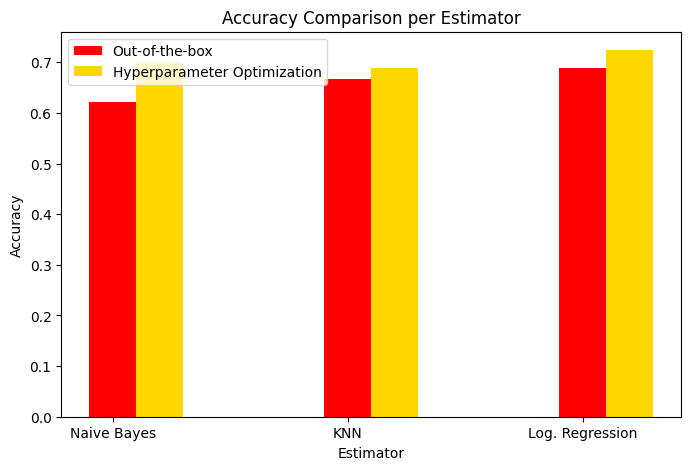

In [ ]:
#Get accuracy of best estimators
best_accuracies = [i[0] for i in evaluations1]
plot_comparison(best_accuracies, plot_accuracy[5:], title='Accuracy Comparison per Estimator')



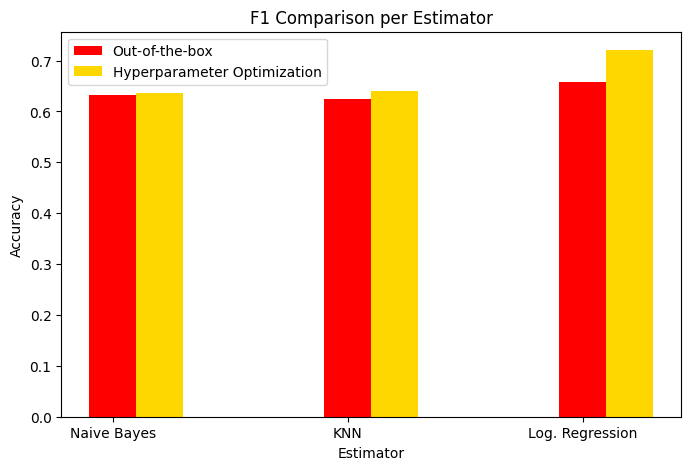

In [ ]:
#Get f1 of best estimators
best_f1 = [i[0]['f1-score'] for i in evaluations2]
plot_comparison(best_f1, list_f1[5:], title='F1 Comparison per Estimator')


<h4 align="justify">Τέλος κατασκευάζουμε τους confusion matrixs του καλύτερου και χειρότερου μοντέλου:</h4>

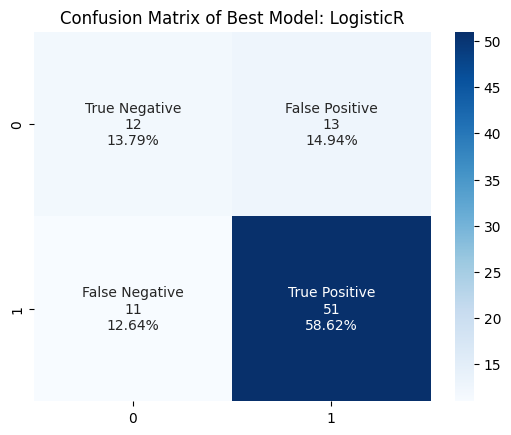

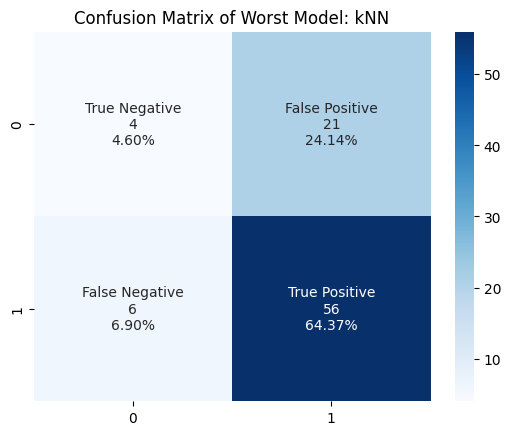

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def show_confusion_matrix(estimator, X_test, y_test, title):
  y_pred = estimator.predict(X_test)
  #Get the confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  allnames = ['True Negative','False Positive','False Negative','True Positive']
  allcounts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  allpercentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(allnames,allcounts,allpercentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
  plt.title(title)
  plt.show()

show_confusion_matrix(best_lr1, X_test, y_test, 'Confusion Matrix of Best Model: LogisticR')
show_confusion_matrix(best_knn1, X_test, y_test, 'Confusion Matrix of Worst Model: kNN')

<h4 align="justify">Για το πρόβλημα κατηγοριοποίησης του δικού μας dataset λοιπόν, θα χρησιμοποιήσουμε τον logistic regression, καθώς εμφανίζει τα καλύτερα ποσοστά true positive και true negative, ενώ εμφανίζει και το καλύτερο f1 score. Επιπλέον, έχει σχετικά χαμηλούς χρόνους εκπαίδευσης και αποτελεί την καλύτερη επιλογή για το binary classification problem. Αντίθετα ο kNN εμφανίζει μεγάλο ποσοστό false positive 23% και σε συνδυασμό με το χαμηλότερο accuracy και το χαμηλό f1 score δεν αποτελεί καλή επιλογή. 
Συνεπώς θα προτιμήσουμε τον ταξινομτή <b>Logistic Regression</b></h4>


<h2><u><b> Μέρος 2. Kaggle Dataset</b></u></h2>


<h3><u><b> Επισκόπηση</b></u></h3>
<h4 align="justify">Στο 2ο μέρος, ασχολούμαστε με το dataset <b>Dry Bean</b>, το οποίο αποτελείται από ένα μόνο αρχείο, το Dry_Bean.csv. Για τη δημιουργία του χρησιμοποιήθηκαν 7 είδη φασολιών, βάσει χαρακτηριστικών τους όπως το σχήμα, ο τύπος και η δομή τους. Ειδικότερα, για την ταξινόμηση των φασολιών, χρησιμοποιήθηκαν εικόνες από 13,611 καρπούς, 7 διαφορετικών ειδών (κλάσεων) με τα αποτελέσματα να βασίζονται σε 16 χαρακτηριστικά (12 διαστατικά και 4 μορφολογικά). Παρατίθενται οι ανωτέρω κλάσεις, καθώς και τα χαρακτηριστικά:</h4>

1. Seker
2. Barbunya
3. Bombay
4. Cali
5. Dermosan
6. Horoz
7. Sira

- Area(A)
- Perimeter(P)
- Major axis length(L)
- Minor axis length(l)
- Aspect ratio (K)
- Eccentricity (Ec)
- Convex area (C)
- Equivalent diameter (Ed)
- Extent (Ex)
- Solidity (S)
- Roundness (R)
- Compactness (CO)
- ShapeFactor1 (SF1)
- ShapeFactor1 (SF2)
- ShapeFactor1 (SF3)

<h4 align="justify">Τα παραπάνω χαρακτηριστικά εμφανίζονται ως τίτλοι στις πρώτες 16 στήλες, ενώ η 17η
τιτλοφορείται από τη λέξη Class και εμπεριέχει το είδος του φασολιού.</h4>

<h4 align="justify">Κάθε στήλη έχει ως τίτλο το χαρακτηριστικό που περιγράφεται. Οι γραμμές δεν είναι αριθμημένες. </h4>

<h4 align="justify">Σημειώνουμε ότι όλα τα χαρακτηριστικά είναι αριθμητικά.</h4>

In [8]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='once')

data = pd.read_csv("/kaggle/input/dry-bean-dataset/Dry_Bean.csv")

In [9]:
print(data.shape)
print(data.head())

(13611, 17)
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358    

In [10]:
# Αρχικά θα δούμε αν το dataset έχει κενές (null) τιμές:
print("The dataset has " + str(np.sum(np.sum(data.isna()))) + " null values")

# Παίρνουμε μια επισκόπηση του dataset
data.info()

The dataset has 0 null values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-n

In [11]:
# Βρίσκουμε τις μοναδικές ετικέτες
class_mapping = {label:idx for idx,label in enumerate(np.unique(data['Class']))}
print(class_mapping)
# και κάνουμε την μετατροπή από object σε integer που διαχειρίζονται ευκολότερα
# οι συναρτήσεις
data['Class'] = data['Class'].map(class_mapping)  

{'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 4, 'SEKER': 5, 'SIRA': 6}


<h4 align="justify">Πρέπει να φέρουμε τα δεδομένα σε κατάλληλη μορφή, σπάζοντας τα data σε x (οι τιμές των 16 χαρακτηριστικών) και y (η αντίστοιχη κλάση στην οποία ανήκει το αντικείμενο): </h4>

In [12]:
# C stands for corrected
c_data = data.values[:, 0:16]
c_datatargets = data.values[:, 16:].astype(int)
print(c_data)
print(c_datatargets)
c_datatargets.shape

[[2.83950000e+04 6.10291000e+02 2.08178117e+02 ... 3.14728900e-03
  8.34222388e-01 9.98723889e-01]
 [2.87340000e+04 6.38018000e+02 2.00524796e+02 ... 3.56362400e-03
  9.09850506e-01 9.98430331e-01]
 [2.93800000e+04 6.24110000e+02 2.12826130e+02 ... 3.04773300e-03
  8.25870617e-01 9.99066137e-01]
 ...
 [4.21390000e+04 7.59321000e+02 2.81539928e+02 ... 1.88827100e-03
  6.76884164e-01 9.96767264e-01]
 [4.21470000e+04 7.63779000e+02 2.83382636e+02 ... 1.85202500e-03
  6.68236684e-01 9.95222420e-01]
 [4.21590000e+04 7.72237000e+02 2.95142741e+02 ... 1.63981200e-03
  6.16220592e-01 9.98179623e-01]]
[[5]
 [5]
 [5]
 ...
 [3]
 [3]
 [3]]


(13611, 1)

<h4 align="justify">Στη συνέχεια εξετάζουμε αν το dataset είναι ισορροπημένο: </h4>

[1322  522 1630 3546 1928 2027 2636]
['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
0 BARBUNYA 0
1 BOMBAY 1
2 CALI 2
3 DERMASON 3
4 HOROZ 4
5 SEKER 5
6 SIRA 6


<BarContainer object of 7 artists>

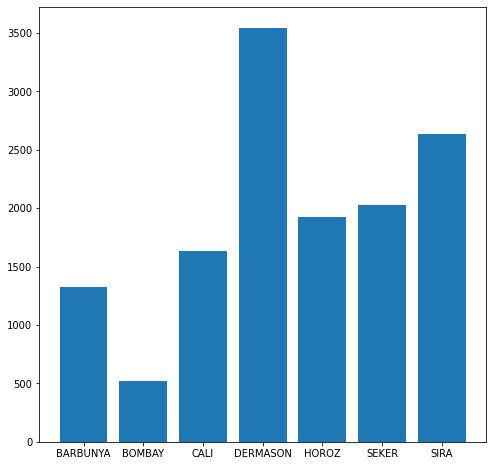

In [13]:
import matplotlib.pyplot as plt

_, counts = np.unique(c_datatargets, return_counts=True)
print(counts)
print(list(class_mapping.keys()))

for counter, classname in enumerate(class_mapping):
  print(counter, classname, class_mapping[classname])

plt.figure(figsize=(8, 8))
plt.bar(class_mapping.keys(), counts)

In [14]:
print("The largest imbalance is: " + "{:.2f}".format(counts.max() / counts.min()) + ":1")

The largest imbalance is: 6.79:1


<h4 align="justify">Εφόσον υπάρχουν κλάσεις με λόγο τιμών πάνω από 1.5:1, θεωρούμε το dataset μη ισορροπημένο. </h4>

<h3><u><b>Επιλογή μετρικής</b></u></h3>

<h4 align="justify">Στο dataset αυτό δεν υπάρχει κάποια μετρική που θέλουμε να δώσουμε προτεραιότητα (όπως π.χ. σε έναν classifier με ιατρικά αποτελέσματα που θέλουμε υψηλό recall), οπότε επιλέγουμε το F1-score ως μετρική που είναι ο αρμονικός μέσος όρος του precision και του recall. </h4>

<h4 align="justify">Επειδή εδώ δεν έχουμε δυαδική ταξινόμηση, αλλά multi-class ταξινόμηση, πρέπει να διαλέξουμε το είδος του F1-score. Όπως εξηγήσαμε πάνω το dataset μας είναι imbalanced, οπότε αν επιλέξουμε το micro F1-score τότε θα δίνεται περισσότερη σημασία στα classes με τον μεγαλύτερο αριθμό δειγμάτων, πράγμα που στη συγκεκριμένη περίπτωση δεν θέλουμε. Επομένως, επιλέγουμε το <b>macro F1-score</b> που δίνει την ίδια έμφαση σε κάθε κλάση.</h4>

<h3><u><b>Train-Test split και επιλογή σχήματος Cross-Validation</b></u></h3>

<h4 align="justify">Επιλέγουμε ποσοστό 70% των δειγμάτων για το train set και 30% των δειγμάτων για το test set, θεωρώντας πως είναι μια κατάτμηση επαρκής για την εκμάθηση των ταξινόμητων, αλλά και για τον έλεγχο της επιλεγμένης μετρικής.</h4>

<h4 align="justify">Για την εύρεση των καλύτερων υπερπαραμέτρων θα εφαρμόσουμε 5-fold cross validation, σπάζοντας κάθε φορά το train dataset σε 5 folds, για να αποφύγουμε μεγάλο όγκο επαναλήψεων, έχοντας λάβει ωστόσο, αρκετά καλές παραμέτρους. </h4>

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(c_data, c_datatargets, test_size=0.30)
y_train, y_test = y_train.ravel(), y_test.ravel()

<h3><u> Dummy Classifiers</u></h3>

<h4>Αρχικά βρίσκουμε την επίδοση των dummy classifiers για να έχουμε ένα μέτρο σύγκρισης.</h4>

In [16]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score

dummy_most_frequent = DummyClassifier(strategy='most_frequent')
dummy_uniform = DummyClassifier(strategy='uniform')
dummy_stratified = DummyClassifier(strategy='stratified')

scores = {}

dummy_most_frequent.fit(x_train, y_train)
predictions = dummy_most_frequent.predict(x_test)
scores['Most Frequent'] = f1_score(predictions, y_test, average='macro')

dummy_uniform.fit(x_train, y_train)
predictions = dummy_uniform.predict(x_test)
scores['Uniform'] = f1_score(predictions, y_test, average='macro')

dummy_stratified.fit(x_train, y_train)
predictions = dummy_stratified.predict(x_test)
scores['Stratified'] = f1_score(predictions, y_test, average='macro')
print(scores)

{'Most Frequent': 0.060278207109737254, 'Uniform': 0.12828699404873806, 'Stratified': 0.14701611956913507}


<h4> Στη συνέχεια εξετάζουμε τους ταξινομητές MLP και SVC με τις default παραμέτρους τους: </h4>

In [17]:
from sklearn.neural_network import MLPClassifier

mlp_default = MLPClassifier()
mlp_default.fit(x_train, y_train)
predictions = mlp_default.predict(x_test)
scores['MLP default'] = f1_score(predictions, y_test, average='macro')
print(scores)

{'Most Frequent': 0.060278207109737254, 'Uniform': 0.12828699404873806, 'Stratified': 0.14701611956913507, 'MLP default': 0.3971478299152153}


In [18]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
predictions = svc.predict(x_test)
scores['SVC default'] = f1_score(predictions, y_test, average='macro')
print(scores)

{'Most Frequent': 0.060278207109737254, 'Uniform': 0.12828699404873806, 'Stratified': 0.14701611956913507, 'MLP default': 0.3971478299152153, 'SVC default': 0.5868288940865974}


<h4>Συνοψίζουμε τα μέχρι στιγμής αποτελέσματα στον παρακάτω πίνακα:</h4>

<h4><i>Σημείωση, οι τιμές μπορεί να αλλάζουν από εκτέλεση σε εκτέλεση, καθώς το train-test split δεν είναι κάθε φορά το ίδιο</i></h4>

Classifier |  Macro F1-score (%) |
--- | --- |
Dummy most frequent | 6.09
Dummy uniform | 12.98
Dummy stratified | 14.00
MLP with default values | 39.71
SVC with default values | 58.68


Text(0.5, 1.0, 'Macro F1-score of selected classifiers')

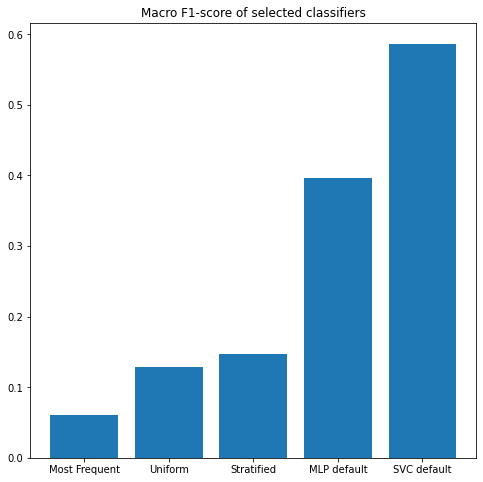

In [19]:
plt.figure(figsize=(8, 8))
plt.bar(scores.keys(), scores.values())
plt.title("Macro F1-score of selected classifiers")

<h3><u> Σχολιασμός out-of-the-box </u></h3>

<h4 align="justify">Βλέπουμε ότι οι default MLP και SVC classifiers έχουν ήδη καλύτερη επίδοση από τους dummy classifiers. Αυτό εξηγείται εύκολα από το γεγονός ότι δεν έχουμε δυαδική ταξινόμηση, αλλά ταξινόμηση σε 7 κατηγορίες, οπότε και το F1-score για τους dummy classifiers  έχει τιμές γύρω στο 100/7 = 14.3%.  </h4>

<h4 align="justify">Τρέχοντας πολλές φορές τους default classifiers παρατηρήσαμε ότι η επίδοση του MLP διαφέρει αρκετά από εκτέλεση σε εκτέλεση (από 6% σε πάνω από 40%), λόγω της διαφοράς του αρχικού state που η βιβλιοθήκη sklearn παράγει κάθε φορά τυχαία. Αν θέλουμε να διαλέγονται κάθε φορά σταθερά βάρη, μπορούμε να ορίσουμε τη μεταβλητή random_state σε κάποια σταθερή τιμή (π.χ. 1). </h4>

<h4 align="justify">Αντιθέτως, o default SVM classifier έχει πιο σταθερό F1-score γύρω στο 59%. Out of the box η καλύτερη επιλογή για το συγκεκριμένο dataset είναι ο SVM classifier. </h4>

<h3><u><b> Βελτιστοποίηση </b></u></h3>

<h4 align="justify">Θα προσπαθήσουμε να βελτιστοποιήσουμε τους δύο ταξινομητές MLP και SVC. Αρχικά, μπορούμε να περάσουμε το dataset από μια προεπεξεργασία για να έχουμε καλύτερα αποτελέσματα. Οι διαδικασίες προεπεξεργασίας που θα δοκιμάσουμε είναι: </h4>

- Variance Threshold για την αφαίρεση των χαρακτηριστικών με χαμηλή διακύμανση
- Standard scaler για την κανονικοποίηση των δεδομένων
- Oversampling για να αποκτήσουμε ισορροπημένο dataset
- PCA για τη μείωση της διασταστικότητας


<h4 align="justify">Μπορούμε να απλοποιήσουμε τη διαδικασία με τη χρήση pipelines που εφαρμόζουν διαδοχικούς μετασχηματισμούς. </h4>

<h4 align="justify">Τόσο οι μετασχηματιστές που αναφέραμε παραπάνω όσο και οι ίδιοι οι ταξινομητές έχουν υπερπαραμέτρους. Η βέλτιστη τιμή τους πρέπει αναγκαστικά να βρεθεί πειραματικά, για αυτό και θα χρησιμοποιήσουμε εύρεση πλέγματος (grid search) </h4>

<h4>Αρχικά θα δοκιμάσουμε pipeline 5 μετασχηματισμών (selector, scaler, sampler, pca, classifier) με default τιμές για όλους. </h4>

In [20]:
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

selector = VarianceThreshold()
standard_scaler = StandardScaler()
sampler = RandomOverSampler()
pca = PCA()
mlp = MLPClassifier()

pipe = Pipeline(steps=[('selector', selector), ('scaler', standard_scaler), ('sampler', sampler), ('pca', pca), ('mlp', mlp)])
pipe2 = Pipeline(steps=[('selector', selector), ('scaler', standard_scaler), ('sampler', sampler), ('pca', pca), ('svc', svc)])

In [21]:
pipe.fit(x_train, y_train)
predictions = pipe.predict(x_test)
scores['Pipeline MLP'] = f1_score(predictions, y_test, average='macro')

pipe2.fit(x_train, y_train)
predictions = pipe2.predict(x_test)
scores['Pipeline SVC'] = f1_score(predictions, y_test, average='macro')

print(scores)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


{'Most Frequent': 0.060278207109737254, 'Uniform': 0.12828699404873806, 'Stratified': 0.14701611956913507, 'MLP default': 0.3971478299152153, 'SVC default': 0.5868288940865974, 'Pipeline MLP': 0.9406796015022226, 'Pipeline SVC': 0.9361254609107608}


Text(0.5, 1.0, 'Macro F1-score of selected classifiers')

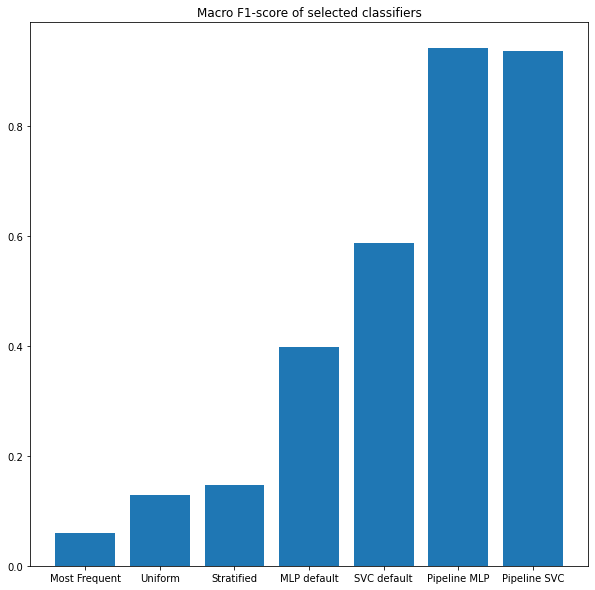

In [22]:
plt.figure(figsize=(10, 10))
plt.bar(scores.keys(), scores.values())
plt.title("Macro F1-score of selected classifiers")

<h3><u> Σχολιασμός </u></h3>
<h4 align="justify">Παρατηρούμε ότι χωρίς να έχουμε αλλάξει καθόλου τις παραμέτρους των ίδιων των ταξινομητών, η προεπεξεργασία του dataset οδήγησε σε δραματική αύξηση του F1-score, με το MLP και το SVC να έχουν απόδοση γύρω στο 94%. Αυτό έγινε με ελάχιστη προγραμματιστική δυσκολία και με ελάχιστη αύξηση του χρόνου εκτέλεσης.</h4>

<h3><u> Εύρεση βέλτιστων υπερπαραμέτρων </u></h3>

<h4 align="justify">Στη συνέχεια θα προσπαθήσουμε να βρούμε τις καλύτερες υπερπαραμέτρους τόσο για τους classifiers όσο και για τους μετασχηματιστές που εφαρμόζουμε στα δεδομένα. Η εύρεση αυτή γίνεται με GridSearch που ελέγχει την επίδοση με διαφορετικούς συνδυασμούς των παραμέτρων.  </h4>

In [23]:
# Βρίσκουμε το ελάχιστο και το μέγιστο variance των χαρακτηριστικών για το variance threshold
train_variance = x_train.var(axis=0)
print(train_variance)
print("Min variance is: " + str(np.min(train_variance)))
print("Max variance is: " + str(np.max(train_variance)))
print("Median variance is: " + str(np.median(train_variance)))

[8.49362140e+08 4.56581014e+04 7.32563253e+03 1.99571422e+03
 6.06225428e-02 8.44546319e-03 8.75829648e+08 3.47770268e+03
 2.39413448e-03 2.17713547e-05 3.53232922e-03 3.79575956e-03
 1.26498738e-06 3.55010503e-07 9.77022945e-03 1.94308366e-05]
Min variance is: 3.5501050346487654e-07
Max variance is: 875829648.2674336
Median variance is: 0.009107846315856396


<h4 align="justify">Στην αρχή βάζουμε μεγάλα εύρη στους πίνακες με τις πιθανές τιμές των υπερπαραμέτρων γιατί δεν γνωρίζουμε ποια είναι η βέλτιστη τιμή. Αν δούμε ότι το Grid Search επιλέγει ακραία τιμή, τότε μπορούμε να δοκιμάσουμε ξανά με πιο μικρό εύρος κοντά στην τιμή αυτή.<h4>

In [24]:
vthreshold = [0, 1e-08, 1e-04]
pca_components = [8, 12, 16]

# MLP hyperparameters
mlp_parameter_grid = {
    'selector__threshold': vthreshold,
    'pca__n_components': pca_components,
    'mlp__activation': ['tanh', 'relu'],
    'mlp__alpha': [1e-04, 1e-02, 1e-01],
    'mlp__hidden_layer_sizes' : [(50, ), (100, ), (50, 50)],
    'mlp__learning_rate': ['constant', 'adaptive']
}

# SVM hyperparameters
svm_parameter_grid = {
                'selector__threshold': vthreshold,
                'pca__n_components': pca_components,
              'svc__kernel': ['linear', 'rbf'],
              'svc__C': [0.1, 1, 10, 100, 1000],
              'svc__gamma': [0.1, 0.01, 0.001, 0.0001]}

In [25]:
from sklearn.model_selection import GridSearchCV
estimator_mlp = GridSearchCV(pipe, mlp_parameter_grid, cv=5, scoring='f1_macro', n_jobs=-1)
estimator_mlp.fit(x_train, y_train)
best_mlp = estimator_mlp.best_estimator_
print(estimator_mlp.best_estimator_)
print("The best parameters are:\n", estimator_mlp.best_params_)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multi

Pipeline(steps=[('selector', VarianceThreshold(threshold=1e-08)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=12)),
                ('mlp', MLPClassifier(alpha=0.1, learning_rate='adaptive'))])
The best parameters are:
 {'mlp__activation': 'relu', 'mlp__alpha': 0.1, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate': 'adaptive', 'pca__n_components': 12, 'selector__threshold': 1e-08}


In [26]:
estimator_svc = GridSearchCV(pipe2, svm_parameter_grid, cv=5, scoring='f1_macro', n_jobs=-1)
estimator_svc.fit(x_train, y_train)
best_svc = estimator_svc.best_estimator_

print(estimator_svc.best_estimator_)
print("The best parameters are:\n", estimator_svc.best_params_)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/imblearn/pipeline.py", line 268, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/opt/conda/lib/python3.7/site-packages/imblearn/pipeline.py", line 223, in _fit
    **fit_params_steps[name],
  File "/opt/conda/lib/python3.7/site-packages/joblib/memory

Pipeline(steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=12)), ('svc', SVC(C=1, gamma=0.1))])
{'pca__n_components': 12, 'selector__threshold': 0, 'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


In [27]:
predictions = best_mlp.predict(x_test)
scores['MLP optimized'] = f1_score(predictions, y_test, average='macro')

predictions = best_svc.predict(x_test)
scores['SVC optimized'] = f1_score(predictions, y_test, average='macro')
print(scores)

{'Most Frequent': 0.060278207109737254, 'Uniform': 0.12828699404873806, 'Stratified': 0.14701611956913507, 'MLP default': 0.3971478299152153, 'SVC default': 0.5868288940865974, 'Pipeline MLP': 0.9406796015022226, 'Pipeline SVC': 0.9361254609107608, 'MLP optimized': 0.9383889058045598, 'SVC optimized': 0.9386836012560292}


Text(0.5, 1.0, 'Macro F1-score of selected classifiers')

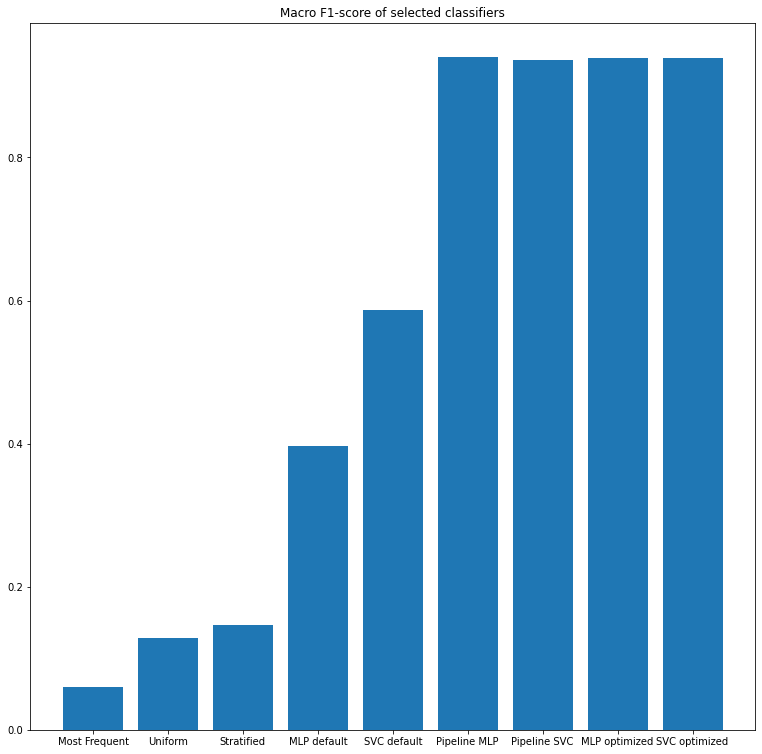

In [28]:
plt.figure(figsize=(13, 13))
plt.bar(scores.keys(), scores.values())
plt.title("Macro F1-score of selected classifiers")

<h4 align="justify">Με βάση τις προηγούμενες μετρήσεις, θα δοκιμάσουμε να αλλάξουμε τις τιμές στο parameter grid ώστε να έχουν μικρότερο εύρος και κοντινό σε αυτό που βρήκαμε προηγουμένως.</h4>

In [29]:
pca_components = [10, 12, 14]

# MLP hyperparameters
mlp_parameter_grid2 = {
    'pca__n_components': pca_components,
    'mlp__activation': ['tanh', 'relu'],
    'mlp__alpha': [5e0-3, 1e-02, 5e-02],
    'mlp__hidden_layer_sizes' : [(50, ), (100, )],
    'mlp__learning_rate': ['constant', 'adaptive']
}

# SVM hyperparameters
svm_parameter_grid2 = {'pca__n_components': pca_components,
              'svc__kernel': ['linear', 'rbf'],
              'svc__C': [50, 100, 150, 200],
              'svc__gamma': [0.05, 0.001, 0.005]}

In [30]:
from sklearn.model_selection import GridSearchCV
estimator_mlp2 = GridSearchCV(pipe, mlp_parameter_grid2, cv=5, scoring='f1_macro', n_jobs=-1)
estimator_mlp2.fit(x_train, y_train)

best_mlp2 = estimator_mlp2.best_estimator_

print(estimator_mlp2.best_estimator_)
print("The best parameters are:\n", estimator_mlp2.best_params_)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multi

Pipeline(steps=[('selector', VarianceThreshold()), ('scaler', StandardScaler()),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=14)),
                ('mlp',
                 MLPClassifier(alpha=0.05, hidden_layer_sizes=(50,),
                               learning_rate='adaptive'))])
The best parameters are:
 {'mlp__activation': 'relu', 'mlp__alpha': 0.05, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'adaptive', 'pca__n_components': 14}


In [31]:
estimator_svc2 = GridSearchCV(pipe2, svm_parameter_grid, cv=5, scoring='f1_macro', n_jobs=-1)
estimator_svc2.fit(x_train, y_train)

best_svc2 = estimator_svc2.best_estimator_

print(estimator_svc2.best_estimator_)
print("The best parameters are:\n", estimator_svc2.best_params_)



/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/imblearn/pipeline.py", line 268, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/opt/conda/lib/python3.7/site-packages/imblearn/pipeline.py", line 223, in _fit
    **fit_params_steps[name],
  File "/opt/conda/lib/python3.7/site-packages/joblib/memory

Pipeline(steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=8)), ('svc', SVC(C=100, gamma=0.01))])
The best parameters are:
 {'pca__n_components': 8, 'selector__threshold': 0, 'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


{'Most Frequent': 0.060278207109737254, 'Uniform': 0.12828699404873806, 'Stratified': 0.14701611956913507, 'MLP default': 0.3971478299152153, 'SVC default': 0.5868288940865974, 'Pipeline MLP': 0.9406796015022226, 'Pipeline SVC': 0.9361254609107608, 'MLP optimized': 0.9383889058045598, 'SVC optimized': 0.9386836012560292, 'MLP optimized 2': 0.9376584297893901, 'SVC optimized 2': 0.9367955036215445}


Text(0.5, 1.0, 'Macro F1-score of selected classifiers')

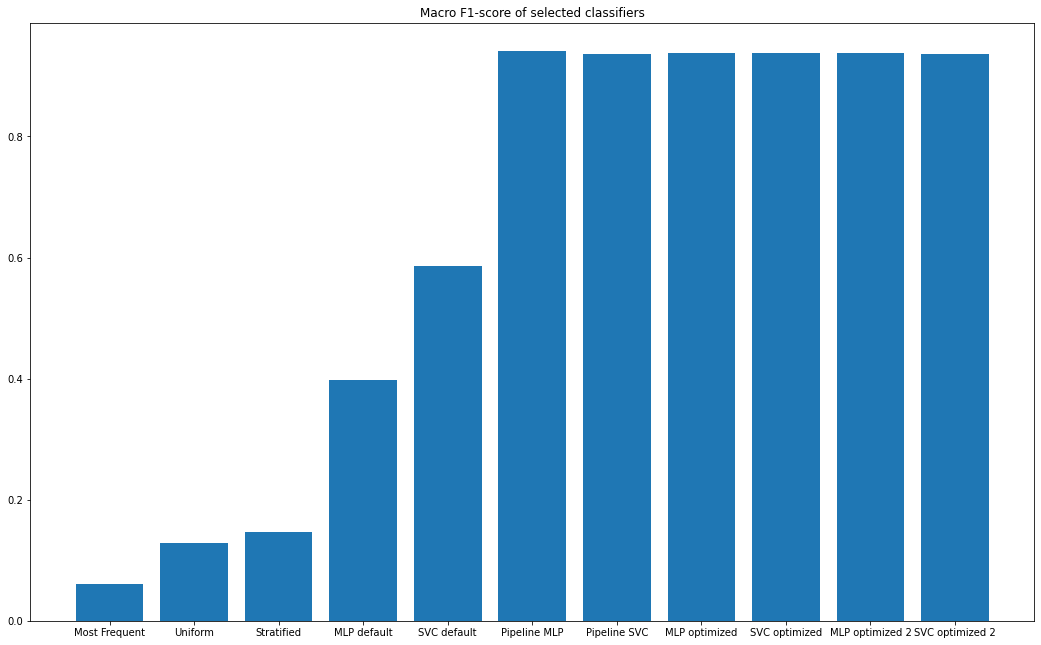

In [32]:
predictions = best_mlp2.predict(x_test)
scores['MLP optimized 2'] = f1_score(predictions, y_test, average='macro')

predictions = best_svc2.predict(x_test)
scores['SVC optimized 2'] = f1_score(predictions, y_test, average='macro')
print(scores)

plt.figure(figsize=(18, 11))
plt.bar(scores.keys(), scores.values())
plt.title("Macro F1-score of selected classifiers")

<h3><u> Σχολιασμός </u></h3>

<h4 align="justify">Μετά την αλλαγή του εύρους των υπερπαραμέτρων, η επίδοση των classifiers δεν βελτιώθηκε σημαντικά. Παρατηρούμε επίσης, ότι κάποιες παράμετροι των οποίων τις τιμές δεν αλλάξαμε (MLP Learning Rate, MLP Hidden Layer Size) εμφάνισαν διαφορετική τιμή στον καλύτερο classifier. </h4>

<h3><u> Βελτιστοποίηση με χρήση βιβλιοθήκης βελτιστοποίησης </u></h3>
<h4 align="justify">Θα χρησιμοποιήσουμε τη βιβλιοθήκη βελτιστοποίησης Optuna για να αυτοματοποιήσουμε και να βελτιώσουμε τη διαδικασία εύρεσης υπερπαραμέτρων: </h4>

In [34]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import svm

def objective(trial):
    
    data = pd.read_csv("/kaggle/input/dry-bean-dataset/Dry_Bean.csv")
    # Load data
    dataAttributes = data.drop("Class",axis=1)
    dataClasses = data[["Class"]]
    # Αρχικά θα δούμε αν το dataset έχει κενές (null) τιμές:
    #print("The dataset has " + str(np.sum(np.sum(data.isna()))) + " null values")
    #print(dataClasses)
    
    # setting random_state to 0 for reproducable results
    x_train1, x_test1, y_train1, y_test1 = train_test_split(dataAttributes, dataClasses, test_size = 0.3)
    
    
    # Implementing StandardScaler feature scaling
    X_train1 = StandardScaler().fit_transform(x_train1)
    X_test1 = StandardScaler().fit_transform(x_test1)

    CLASSES = np.array(["SEKER","BARBUNYA","BOMBAY","CALI","DERMASON","HOROZ","SIRA"])
    d = dict(zip(CLASSES, range(0,7)))
    y_test1 = y_test1['Class'].map(d, na_action='ignore')
    y_train1 = y_train1['Class'].map(d, na_action='ignore')

    y_train1 =  np.ravel(y_train1)
    y_test1 = np.ravel(y_test1)
    
    X = np.append(X_train1, X_test1).reshape(13611,16)
    y = np.append(y_train1, y_test1)
    

    # Sample hyper parameters
    classifier_name = trial.suggest_categorical("classifier", ["MLPClassifier",
                                                               "SVC"])
    if classifier_name=="MLPClassifier":

        # Sample hyper parameters
        activation = trial.suggest_categorical('activation', ["tanh", "relu"])
        tol = trial.suggest_loguniform('tol', 1e-8, 1e-1)
        learning_rate = trial.suggest_categorical('learning_rate', 
                                           ["constant","invscaling"])
        # Construct the model
        clf = MLPClassifier(activation=activation,
                               tol=tol,
                               learning_rate=learning_rate
                               
                               )
    elif classifier_name=="SVC":

        # Sample hyper parameters
        C = trial.suggest_loguniform('C', 1e-04, 1e-02)
        kernel = trial.suggest_categorical('kernel',['poly','rbf','sigmoid'])
        degree = trial.suggest_int('degree',1, 50)
        gamma = trial.suggest_loguniform('gamma', 0.001, 10000)

        # Construct the model
        clf = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma)
    
    # Train the model
    clf.fit(X_train1, y_train1)

    # Evaluate the model
    y_pred_test1 = clf.predict(X_test1)
    loss = mean_squared_error(y_test1, y_pred_test1)

    print("Test Score:",clf.score(X_test1, y_test1))
    print("Train Score:",clf.score(X_train1, y_train1))
    
    print("\n=================")
    return loss


In [35]:
import optuna
import warnings
warnings.filterwarnings('ignore')

# depending on the definition of objective
# we can create study object with either minimize or maximize
study = optuna.create_study(direction='minimize')

# start tuning for the hyper-parameters
study.optimize(objective, n_trials=100, n_jobs=-1)


[I 2022-12-06 15:41:29,444] A new study created in memory with name: no-name-98cfc2e7-a784-4170-916e-a44208d599f9


Test Score: 0.26909892262487756


[I 2022-12-06 15:41:53,081] Trial 0 finished with value: 4.361655239960823 and parameters: {'classifier': 'SVC', 'C': 0.007730611506775821, 'kernel': 'poly', 'degree': 27, 'gamma': 0.010436506916387913}. Best is trial 0 with value: 4.361655239960823.


Train Score: 0.2827752702844547



[I 2022-12-06 15:42:03,530] Trial 3 finished with value: 0.6400587659157688 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'tol': 0.0009871768701539961, 'learning_rate': 'constant'}. Best is trial 3 with value: 0.6400587659157688.


Test Score: 0.9262977473065622
Train Score: 0.9267345439277842

Test Score: 0.25710088148873655


[I 2022-12-06 15:42:48,406] Trial 5 finished with value: 4.528403525954946 and parameters: {'classifier': 'SVC', 'C': 0.00031048038227836746, 'kernel': 'sigmoid', 'degree': 37, 'gamma': 0.09707063307965787}. Best is trial 3 with value: 0.6400587659157688.


Train Score: 0.2619922326020783



[I 2022-12-06 15:43:13,973] Trial 4 finished with value: 0.6302644466209598 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 0.0005117418879340511, 'learning_rate': 'constant'}. Best is trial 4 with value: 0.6302644466209598.


Test Score: 0.930460333006856
Train Score: 0.9399601133620237

Test Score: 0.2568560235063663


[I 2022-12-06 15:43:23,587] Trial 1 finished with value: 0.5690499510284035 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 2.6529015669410586e-07, 'learning_rate': 'invscaling'}. Best is trial 1 with value: 0.5690499510284035.
[I 2022-12-06 15:43:23,720] Trial 8 finished with value: 10.57590597453477 and parameters: {'classifier': 'SVC', 'C': 0.0020071650499394102, 'kernel': 'poly', 'degree': 40, 'gamma': 3858.8954746773948}. Best is trial 1 with value: 0.5690499510284035.


Test Score: 0.9302154750244858
Train Score: 0.942479269444736

Test Score: 0.19809010773751223
Train Score: 0.19177075679647318



[I 2022-12-06 15:43:26,156] Trial 6 finished with value: 4.513956904995103 and parameters: {'classifier': 'SVC', 'C': 0.0004942814028445684, 'kernel': 'sigmoid', 'degree': 38, 'gamma': 0.033773507291818314}. Best is trial 1 with value: 0.5690499510284035.


Train Score: 0.262097197438858

Test Score: 0.2595494613124388


[I 2022-12-06 15:43:38,713] Trial 7 finished with value: 4.426297747306562 and parameters: {'classifier': 'SVC', 'C': 0.0023529220799873483, 'kernel': 'rbf', 'degree': 32, 'gamma': 2.2852998943011382}. Best is trial 1 with value: 0.5690499510284035.


Train Score: 0.2609425842342815

Test Score: 0.24975514201762977
Test Score: 0.2524485798237023


[I 2022-12-06 15:43:46,293] Trial 9 finished with value: 5.124877571008815 and parameters: {'classifier': 'SVC', 'C': 0.0002267876726597556, 'kernel': 'sigmoid', 'degree': 13, 'gamma': 5.068586213001898}. Best is trial 1 with value: 0.5690499510284035.


Train Score: 0.26577096672614675



[I 2022-12-06 15:43:56,674] Trial 10 finished with value: 4.523506366307542 and parameters: {'classifier': 'SVC', 'C': 0.0001736366339588703, 'kernel': 'rbf', 'degree': 10, 'gamma': 0.0013519197468419824}. Best is trial 1 with value: 0.5690499510284035.


Train Score: 0.2639865645008922

Test Score: 0.29407443682664053


[I 2022-12-06 15:44:33,723] Trial 11 finished with value: 4.6787463271302645 and parameters: {'classifier': 'SVC', 'C': 0.0010625015012788353, 'kernel': 'rbf', 'degree': 18, 'gamma': 0.03650112206610604}. Best is trial 1 with value: 0.5690499510284035.


Train Score: 0.29998950351632203



[I 2022-12-06 15:46:47,170] Trial 12 finished with value: 0.7203721841332027 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'tol': 3.0504284371371396e-07, 'learning_rate': 'constant'}. Best is trial 1 with value: 0.5690499510284035.


Test Score: 0.9226248775710089
Train Score: 0.9416395507504985



[I 2022-12-06 15:46:55,024] Trial 13 finished with value: 0.5475024485798237 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 1.2758668981734213e-08, 'learning_rate': 'invscaling'}. Best is trial 13 with value: 0.5475024485798237.


Test Score: 0.930460333006856
Train Score: 0.942479269444736



[I 2022-12-06 15:47:43,290] Trial 14 finished with value: 0.5648873653281097 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 4.9064886337256994e-08, 'learning_rate': 'invscaling'}. Best is trial 13 with value: 0.5475024485798237.


Test Score: 0.93486777668952
Train Score: 0.9404849375459221



[I 2022-12-06 15:49:55,455] Trial 15 finished with value: 0.4975514201762977 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 8.091212541458159e-06, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.932664054848188
Train Score: 0.9394352891781254



[I 2022-12-06 15:50:04,925] Trial 16 finished with value: 0.5080803134182175 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 1.0672708953865681e-08, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.935847208619001
Train Score: 0.9417445155872782



[I 2022-12-06 15:50:54,371] Trial 17 finished with value: 0.6018609206660137 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 1.3051278755542331e-08, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9297257590597453
Train Score: 0.9417445155872782



[I 2022-12-06 15:51:08,720] Trial 20 finished with value: 0.6346718903036239 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 0.07201030197938421, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9258080313418218
Train Score: 0.9245302823554109



[I 2022-12-06 15:52:53,569] Trial 18 finished with value: 0.5724779627815867 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 1.2366162702704348e-05, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9365817825661117
Train Score: 0.9397501836884644



[I 2022-12-06 15:53:04,138] Trial 19 finished with value: 0.6231635651322233 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 6.095627810754897e-06, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9311949069539667
Train Score: 0.9436338826493125



[I 2022-12-06 15:54:12,795] Trial 21 finished with value: 0.5144466209598433 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 8.494566651569517e-06, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.933643486777669
Train Score: 0.9406948672194815



[I 2022-12-06 15:56:27,247] Trial 22 finished with value: 0.6150832517140059 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'tol': 1.2497106440278216e-05, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9236043095004897
Train Score: 0.9411147265666002



[I 2022-12-06 15:56:42,273] Trial 23 finished with value: 0.5149363369245837 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'tol': 1.4057306857279231e-06, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9341332027424094
Train Score: 0.9367062034218537



[I 2022-12-06 15:57:29,634] Trial 24 finished with value: 0.5825171400587659 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 1.5445513224337804e-06, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9289911851126347
Train Score: 0.9426891991182954



[I 2022-12-06 15:58:55,800] Trial 27 finished with value: 0.6327130264446621 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 0.000395608326831928, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9292360430950048
Train Score: 0.936601238585074



[I 2022-12-06 15:59:28,730] Trial 25 finished with value: 0.5501958863858962 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 0.00024752345560201275, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9311949069539667
Train Score: 0.9440537419964312



[I 2022-12-06 15:59:48,011] Trial 26 finished with value: 0.6165523996082273 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 0.00010727489484345879, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9191968658178257
Train Score: 0.9438438123228718



[I 2022-12-06 15:59:50,001] Trial 29 finished with value: 0.5940254652301665 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 0.00761649932948473, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.928256611165524
Train Score: 0.9273643329484622



[I 2022-12-06 16:00:04,705] Trial 30 finished with value: 0.7125367286973555 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 0.036110780326444505, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9240940254652301
Train Score: 0.9259997900703264



[I 2022-12-06 16:02:12,465] Trial 28 finished with value: 0.5423604309500489 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 0.00015031868199412768, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9302154750244858
Train Score: 0.9433189881389734



[I 2022-12-06 16:03:06,982] Trial 31 finished with value: 0.5516650342801175 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 4.353442690215845e-05, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.933643486777669
Train Score: 0.939540254014905



[I 2022-12-06 16:03:23,251] Trial 32 finished with value: 0.5754162585700294 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 4.572014182937354e-05, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9299706170421156
Train Score: 0.9422693397711767



[I 2022-12-06 16:05:44,682] Trial 33 finished with value: 0.5492164544564153 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'tol': 4.3176490740233695e-05, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9297257590597453
Train Score: 0.939855148525244



[I 2022-12-06 16:06:41,465] Trial 34 finished with value: 0.5626836434867777 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'tol': 1.5756137678173216e-06, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9302154750244858
Train Score: 0.9375459221160911



[I 2022-12-06 16:06:55,866] Trial 35 finished with value: 0.566356513222331 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'tol': 1.5574943996376826e-06, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.930460333006856
Train Score: 0.9388055001574472



[I 2022-12-06 16:09:08,519] Trial 36 finished with value: 0.5746816846229187 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'tol': 1.8156466506926056e-06, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9299706170421156
Train Score: 0.9357615198908366



[I 2022-12-06 16:10:09,833] Trial 37 finished with value: 0.56513222331048 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'tol': 1.695204841814959e-06, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9324191968658179
Train Score: 0.9376508869528708



[I 2022-12-06 16:10:27,266] Trial 38 finished with value: 0.571743388834476 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'tol': 3.027902975861191e-07, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.931439764936337
Train Score: 0.9389104649942269



[I 2022-12-06 16:12:40,899] Trial 39 finished with value: 0.5335455435847208 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'tol': 2.5590048870461185e-07, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9368266405484819
Train Score: 0.9347118715230398



[I 2022-12-06 16:12:41,107] Trial 42 finished with value: 10.915034280117531 and parameters: {'classifier': 'SVC', 'C': 0.00010016805355395221, 'kernel': 'poly', 'degree': 50, 'gamma': 7845.459059366315}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.18707149853085211
Train Score: 0.19649417445155873



[I 2022-12-06 16:13:25,561] Trial 41 finished with value: 0.6197355533790402 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 1.334493528930387e-07, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9248285994123409
Train Score: 0.9441587068332109



[I 2022-12-06 16:13:39,299] Trial 40 finished with value: 0.5497061704211558 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'tol': 2.6784613103169465e-07, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9341332027424094
Train Score: 0.9375459221160911



[I 2022-12-06 16:15:38,669] Trial 43 finished with value: 0.5631733594515181 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 1.225427147315251e-07, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9277668952007836
Train Score: 0.94447360134355



[I 2022-12-06 16:16:56,573] Trial 44 finished with value: 0.6030852105778648 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'tol': 5.211770133147708e-08, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9285014691478942
Train Score: 0.9402750078723627



[I 2022-12-06 16:17:00,701] Trial 45 finished with value: 0.5763956904995103 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'tol': 5.9443863810566576e-08, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9280117531831538
Train Score: 0.9380707462999895



[I 2022-12-06 16:17:27,699] Trial 46 finished with value: 0.5866797257590598 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'tol': 6.025034502523183e-06, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9285014691478942
Train Score: 0.9405899023827018

Test Score: 0.2546523016650343
Test Score: 0.26273261508325174


[I 2022-12-06 16:17:43,214] Trial 47 finished with value: 4.442213516160627 and parameters: {'classifier': 'SVC', 'C': 0.00966637914686651, 'kernel': 'rbf', 'degree': 4, 'gamma': 146.34701590507652}. Best is trial 15 with value: 0.4975514201762977.
[I 2022-12-06 16:17:43,317] Trial 50 finished with value: 10.767384916748286 and parameters: {'classifier': 'SVC', 'C': 0.0033227643459410447, 'kernel': 'poly', 'degree': 50, 'gamma': 124.19621984693235}. Best is trial 15 with value: 0.4975514201762977.


Train Score: 0.2630418809698751

Test Score: 0.1897649363369246
Train Score: 0.19533956124698226



[I 2022-12-06 16:17:43,758] Trial 48 finished with value: 4.5771302644466205 and parameters: {'classifier': 'SVC', 'C': 0.007055200603137719, 'kernel': 'rbf', 'degree': 4, 'gamma': 234.1379783926786}. Best is trial 15 with value: 0.4975514201762977.


Train Score: 0.2595780413561457

Test Score: 0.2686092066601371


[I 2022-12-06 16:18:08,787] Trial 49 finished with value: 4.331047992164544 and parameters: {'classifier': 'SVC', 'C': 0.006784444193523282, 'kernel': 'rbf', 'degree': 3, 'gamma': 113.8179465804762}. Best is trial 15 with value: 0.4975514201762977.


Train Score: 0.2570588852734334



[I 2022-12-06 16:21:09,200] Trial 51 finished with value: 0.5984329089128305 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'tol': 7.338701382640094e-07, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.4975514201762977.
[I 2022-12-06 16:21:09,272] Trial 52 finished with value: 0.6579333986287953 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'tol': 6.130818743031231e-07, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9331537708129285
Test Score: 0.9270323212536729
Train Score: 0.9335572583184634

Train Score: 0.939540254014905



[I 2022-12-06 16:21:34,048] Trial 53 finished with value: 0.568560235063663 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'tol': 4.10585333674554e-06, 'learning_rate': 'constant'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9329089128305583
Train Score: 0.936286344074735



[I 2022-12-06 16:24:05,469] Trial 55 finished with value: 0.6527913809990206 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 4.367259071503985e-06, 'learning_rate': 'invscaling'}. Best is trial 15 with value: 0.4975514201762977.


Test Score: 0.9260528893241919
Train Score: 0.9441587068332109



[I 2022-12-06 16:24:07,819] Trial 54 finished with value: 0.49069539666993145 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 4.229069736479337e-06, 'learning_rate': 'invscaling'}. Best is trial 54 with value: 0.49069539666993145.


Test Score: 0.9368266405484819
Train Score: 0.9407998320562612



[I 2022-12-06 16:24:24,210] Trial 56 finished with value: 0.5426052889324192 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 0.00015445578191757982, 'learning_rate': 'invscaling'}. Best is trial 54 with value: 0.49069539666993145.


Test Score: 0.9351126346718903
Train Score: 0.9415345859137189



[I 2022-12-06 16:24:50,053] Trial 57 finished with value: 0.6390793339862879 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 0.0010245236151040804, 'learning_rate': 'invscaling'}. Best is trial 54 with value: 0.49069539666993145.


Test Score: 0.9267874632713027
Train Score: 0.9351317308701586



[I 2022-12-06 16:26:58,790] Trial 58 finished with value: 0.5688050930460333 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 9.47944954591432e-06, 'learning_rate': 'invscaling'}. Best is trial 54 with value: 0.49069539666993145.


Test Score: 0.9333986287952988
Train Score: 0.9406948672194815



[I 2022-12-06 16:27:16,419] Trial 59 finished with value: 0.5928011753183153 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 2.124385415835973e-05, 'learning_rate': 'invscaling'}. Best is trial 54 with value: 0.49069539666993145.


Test Score: 0.9287463271302644
Train Score: 0.9417445155872782



[I 2022-12-06 16:27:46,751] Trial 60 finished with value: 0.541380999020568 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 1.2638151588400888e-05, 'learning_rate': 'invscaling'}. Best is trial 54 with value: 0.49069539666993145.


Test Score: 0.9351126346718903
Train Score: 0.9403799727091424



[I 2022-12-06 16:29:55,259] Trial 61 finished with value: 0.685847208619001 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 2.2954646049068572e-05, 'learning_rate': 'invscaling'}. Best is trial 54 with value: 0.49069539666993145.


Test Score: 0.9267874632713027
Train Score: 0.9430040936286344



[I 2022-12-06 16:30:16,286] Trial 62 finished with value: 0.616307541625857 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 1.1529689654914021e-08, 'learning_rate': 'invscaling'}. Best is trial 54 with value: 0.49069539666993145.


Test Score: 0.9356023506366308
Train Score: 0.9414296210769392



[I 2022-12-06 16:30:49,545] Trial 63 finished with value: 0.4603330068560235 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 2.11239831912281e-08, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9414789422135161
Train Score: 0.9382806759735489



[I 2022-12-06 16:33:01,881] Trial 64 finished with value: 0.6192458374142997 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 1.4774893419695686e-08, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9285014691478942
Train Score: 0.9441587068332109



[I 2022-12-06 16:33:13,842] Trial 65 finished with value: 0.5585210577864839 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 3.308083886716641e-06, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9360920666013712
Train Score: 0.9422693397711767



[I 2022-12-06 16:33:52,446] Trial 66 finished with value: 0.6584231145935358 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 1.7756429061227927e-08, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9270323212536729
Train Score: 0.942479269444736



[I 2022-12-06 16:35:53,337] Trial 67 finished with value: 0.6312438785504407 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 2.3187913209079506e-08, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9292360430950048
Train Score: 0.9426891991182954



[I 2022-12-06 16:36:13,199] Trial 68 finished with value: 0.5602350636630754 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 2.435633755910724e-08, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9240940254652301
Train Score: 0.942479269444736



[I 2022-12-06 16:36:45,637] Trial 69 finished with value: 0.5342801175318316 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 2.6283594151833993e-08, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9316846229187071
Train Score: 0.9381757111367692



[I 2022-12-06 16:38:50,304] Trial 70 finished with value: 0.5803134182174339 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 5.824231144525203e-07, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.931439764936337
Train Score: 0.9420594100976173



[I 2022-12-06 16:39:11,449] Trial 71 finished with value: 0.6483839373163565 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 5.123307340506948e-07, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.931439764936337
Train Score: 0.9420594100976173



[I 2022-12-06 16:39:36,077] Trial 72 finished with value: 0.5839862879529872 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 5.778920356555005e-07, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9356023506366308
Train Score: 0.9416395507504985



[I 2022-12-06 16:41:43,826] Trial 73 finished with value: 0.5739471106758081 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 8.386518159076509e-08, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9311949069539667
Train Score: 0.9422693397711767



[I 2022-12-06 16:42:03,570] Trial 74 finished with value: 0.5433398628795298 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 3.285480448238611e-08, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9329089128305583
Train Score: 0.9410097617298205



[I 2022-12-06 16:42:29,073] Trial 75 finished with value: 0.5568070519098922 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 1.1828959903596678e-07, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9289911851126347
Train Score: 0.9409047968930409



[I 2022-12-06 16:44:42,524] Trial 76 finished with value: 0.596718903036239 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 1.1841231735154566e-07, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9292360430950048
Train Score: 0.9432140233021937



[I 2022-12-06 16:45:03,886] Trial 77 finished with value: 0.49730656219392755 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 1.8294756742496003e-07, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9409892262487757
Train Score: 0.9374409572793114



[I 2022-12-06 16:45:29,090] Trial 78 finished with value: 0.548971596474045 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 3.522354212593463e-08, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9316846229187071
Train Score: 0.942164374934397



[I 2022-12-06 16:48:08,536] Trial 79 finished with value: 0.536973555337904 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'tol': 2.878497396357177e-06, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9331537708129285
Train Score: 0.9355515902172772



[I 2022-12-06 16:48:32,250] Trial 80 finished with value: 0.6865817825661117 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'tol': 2.4225362042188595e-06, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9285014691478942
Train Score: 0.9384906056471082



[I 2022-12-06 16:48:50,154] Trial 81 finished with value: 0.6057786483839374 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'tol': 9.55216055780102e-07, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9267874632713027
Train Score: 0.9377558517896505

Test Score: 0.3944662095984329


[I 2022-12-06 16:49:12,033] Trial 83 finished with value: 4.932908912830558 and parameters: {'classifier': 'SVC', 'C': 0.0008002370624333608, 'kernel': 'sigmoid', 'degree': 22, 'gamma': 0.6903745970422501}. Best is trial 63 with value: 0.4603330068560235.


Train Score: 0.400335887477695



[I 2022-12-06 16:51:19,928] Trial 82 finished with value: 0.5768854064642507 and parameters: {'classifier': 'MLPClassifier', 'activation': 'tanh', 'tol': 9.254628186806377e-06, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9287463271302644
Train Score: 0.9393303243413457



[I 2022-12-06 16:51:45,481] Trial 84 finished with value: 0.4933888344760039 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 1.766808548020296e-07, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9385406464250735
Train Score: 0.9389104649942269



[I 2022-12-06 16:52:17,693] Trial 85 finished with value: 0.5193437806072478 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 8.36934029821262e-06, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9338883447600391
Train Score: 0.9393303243413457



[I 2022-12-06 16:54:18,397] Trial 86 finished with value: 0.5124877571008815 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 1.6210341862013263e-07, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9338883447600391
Train Score: 0.9409047968930409



[I 2022-12-06 16:54:42,050] Trial 87 finished with value: 0.5822722820763957 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 2.038751000439017e-07, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9321743388834476
Train Score: 0.9414296210769392



[I 2022-12-06 16:55:09,469] Trial 88 finished with value: 0.5795788442703232 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 6.191910263821569e-06, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9267874632713027
Train Score: 0.9435289178125328



[I 2022-12-06 16:57:10,867] Trial 89 finished with value: 0.5648873653281097 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 2.574582029728497e-07, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9343780607247796
Train Score: 0.9406948672194815



[I 2022-12-06 16:57:31,963] Trial 90 finished with value: 0.5609696376101861 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 5.6890088326950585e-08, 'learning_rate': 'constant'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9302154750244858
Train Score: 0.9425842342815157



[I 2022-12-06 16:58:01,342] Trial 91 finished with value: 0.5166503428011753 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 7.117372661872059e-08, 'learning_rate': 'constant'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.932664054848188
Train Score: 0.9409047968930409



[I 2022-12-06 17:00:09,105] Trial 92 finished with value: 0.5088148873653281 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 1.0608608348008452e-06, 'learning_rate': 'constant'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9368266405484819
Train Score: 0.9410097617298205



[I 2022-12-06 17:00:26,114] Trial 93 finished with value: 0.6400587659157688 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 1.0835462096754036e-06, 'learning_rate': 'invscaling'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.925073457394711
Train Score: 0.9437388474860922



[I 2022-12-06 17:01:02,507] Trial 94 finished with value: 0.5533790401567091 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 1.0137396385979572e-08, 'learning_rate': 'constant'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9292360430950048
Train Score: 0.9440537419964312



[I 2022-12-06 17:03:17,379] Trial 95 finished with value: 0.5724779627815867 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 9.091485068931124e-07, 'learning_rate': 'constant'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.933643486777669
Train Score: 0.9433189881389734



[I 2022-12-06 17:03:35,065] Trial 96 finished with value: 0.6971106758080313 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 1.036261790873154e-06, 'learning_rate': 'constant'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9177277179236043
Train Score: 0.9441587068332109



[I 2022-12-06 17:03:35,308] Trial 99 finished with value: 10.799216454456415 and parameters: {'classifier': 'SVC', 'C': 0.0008687072558828795, 'kernel': 'poly', 'degree': 44, 'gamma': 13.44370416695105}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.19368266405484819
Train Score: 0.1936601238585074



[I 2022-12-06 17:03:44,599] Trial 97 finished with value: 0.5854554358472086 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 1.842182586197043e-07, 'learning_rate': 'constant'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9307051909892262
Train Score: 0.9422693397711767



[I 2022-12-06 17:03:55,161] Trial 98 finished with value: 0.5318315377081293 and parameters: {'classifier': 'MLPClassifier', 'activation': 'relu', 'tol': 1.4874019250778004e-05, 'learning_rate': 'constant'}. Best is trial 63 with value: 0.4603330068560235.


Test Score: 0.9289911851126347
Train Score: 0.9420594100976173



KeyboardInterrupt: 

<h4 align="justify"><i> Σημείωση: Η εύρεση υπερπαραμέτρων με Optuna εκτελούνταν για πολλές ώρες, φτάνοντας μέχρι και το trial 98 από τα 100, οπότε και θεωρήθηκε αμελητέα η συνεισφορά των 2 τελευταίων trials με αποτέλεσμα τη διακοπή της διαδικασίας </i></h4>

<h3><u><b>Τεκμηρίωση της διαδικασίας</b></u></h3>

<h4 align="justify">Αρχικά, ελέγξαμε ως μέτρο σύγκρισης την επίδοση των dummy classifiers στο dataset μας και για την μετρική F1 και είδαμε πως κυμαίνεται γύρω στο 10%. </h4>

<h4 align="justify">Oι ταξινομητές MLP και SVM, με τις default παραμέτρους τους στην out-of-the-box εκτέλεση πετυχαίνουν ποσοστά γύρω στο 25% (μεγάλο εύρος τιμών) και 58% αντίστοιχα. Το πρώτο βήμα για τη βελτιστοιποίηση των ποσοστών αυτών ήταν να κάνουμε μια προεπεξεργασία του dataset. Ειδικότερα:
<ul>
    <li> Variance Threshold: Αφαιρέθηκαν χαρακτηριστικά χαμηλής διακύμανσης, καθώς πρακτικά δε συνεισφέρουν στην εκμάθηση των μοντέλων μας</li>
    <li> Standard Scaler: Κανονικοποιήσαμε τα χαρακτηριστικά, περιορίζοντας τις τιμές τους σε συγκεκριμένο εύρος, διευκολύνοντας έτσι τη διαχείρισή τους</li>
    <li> Oversampling: Όπως είδαμε και στην αρχή, το dataset μας είναι σε μεγάλο βαθμό μη ισορροπημένο, επομένως προβήκαμε σε εξισσορόπηση αυτού μέσω υπερδειγματοληψίας</li>
    <li> PCA: Μειώσαμε τη διαστατικότητα των στοιχείων, προς διευκόλυνση της εκπαίδευσης</li>
</ul>
</h4>
<h4 align="justify">Τα παραπάνω εφαρμόστηκαν στον καθένα εκ των 2 ταξινομητών μας με τη χρήση εξατομικευμένων pipelines, των οποίων την τελική επίδοση μετράμε ωσάν να ήταν ταξινομητές. Η διαδικασία αυτή μας έδωσε τιμές F1_score κοντά στο 94% για αμφότερους τους MLP και SVM classifiers. Στη συνέχεια, εξετάσαμε έναν χώρο τιμών για εύρεση βέλτιστων υπερπαραμέτρων μέσω gridsearch. Τα αποτελέσματα της πρώτης αυτής αναζήτησης χρησιμοποιήθηκαν εκ νέου για τον περιορισμό του χώρου τιμών των υπερπαραμέτρων, χωρίς ωστόσο να παρέχουν αξιοσημείωτη βελτίωση πάνω από το ποσοστό που αναφέραμε. Τέλος, για την αυτοματοποίηση της παραπάνω διαδικασίας εύρεσης παραμέτρων, χρησιμοποιήθηκε η βιβλιοθήκη Optuna, η οποία και μας επέστρεψε τις βέλτιστες τιμές.</h4>


<h3><u><b>Παρουσίαση αποτελεσμάτων</b></u></h3>

Classifier |  Macro F1-score (%) |
--- | --- |
MLP with default values | 39.71
SVC with default values | 58.68
MLP with preprocessing (pipelined) | 94.07 
SVM with preprocessing (pipelined) | 93.61
MLP optimized (GridSearch-1) | 93.84
SVM optimized (GridSearch-1) | 93.87
MLP optimized (GridSearch-2) | 93.77
SVM optimized (GridSearch-2) | 93.68

<h4 align="justify">Όπως είδαμε και παραπάνω, η προεπεξεργασία αυξάνει σημαντικά τις επιδόσεις των ταξινομητών στη μετρική της επιλογής μας. Από εκεί και έπειτα, το gridsearch προκαλεί από αμελητέα αύξηση έως και οριακή μείωση του F1_score, υποδεικνύοντάς μας πως οι default παράμετροι των MLP και SVM ήταν αρκούντως καλοί για την ταξινόμηση που έπρεπε να κάνουν. Τα ποσοστά θα μπορούσαν πιθανόν να αυξηθούν εάν είχαμε μεγαλύτερο ποσοστό στο train set (80/20 η 75/25) αντί του 70/30 που επιλέχθηκε, καθώς οι ταξινομητές θα μπορούσαν να εκπαιδευτούν καλύτερα σε όλες τις κλάσεις του συνόλου δεδομένων μας. Ενδεχομένως, μια άλλη αλλαγή που θα βελτίωνε τις υπερπαραμέτρους θα ήταν η επιλογή μεγαλύτερου k στο k-fold cross-validation, ή ακόμα μεγαλύτερα εύρη τιμών για αυτές, επιλογές που θεωρούμε πως είναι μη συμφέρουσες αναλογιζόμενοι το υπολογιστικό κόστος που απαιτούν και της μικρής επιπρόσθετης βελτίωσης που θα επιφέρουν.</h4>

<h3><u><b>Συμπεράσματα</b></u></h3>

<h4 align="justify">Συνοψίζοντας, μπορούμε να ισχυριστούμε πως με ελάχιστη διαφορά ο MLP είναι προτιμότερος ταξινομητής για το dataset μας, καθώς παρουσιάζει σε γενικές γραμμές ελάχιστα καλύτερες αποδόσεις. Τα παραπάνω ωστόσο, αφορούν το προεπεξεργασμένο dataset, καθώς εάν θέλαμε να επιλέξουμε ταξινόμητη για out-of-the-box επιδόσεις θα επιλέγαμε τον SVM, ο οποίος έχει και υψηλότερα F1_score, αλλά και χαμηλότερα ποσοστά διακύμανσης γύρω από τις τιμές αυτές, δίνοντας μας ένα σχετικά προβλέψιμο κάθε φορά αποτέλεσμα, σε αντίθεση με τον MLP </h4>